# Visualize Prediction

## Imports and Functions

In [1]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, GRU, Conv1D, Flatten, Reshape

import os
import numpy as np
import sys
import tensorflow as tf
import random
import keras

SEED = 42

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    keras.utils.set_random_seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)

In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

FIRST_YEAR= 1972
FREQUENCY= "monthly"

c:\Users\marti\Desktop\data\hw_extra


In [3]:
folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    PredictionExperiment,
    PredictionModel,
    get_info_experiment
)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
indices_of_interest = ["HWN", "HWF", "HWD", "HWM", "HWA"]


## Chile good predictions per season

In [5]:
region="chile"
metadata = pd.read_csv(f"data/climate_features/{region}/metadata.csv")
metadata.reset_index(inplace=True, drop=True)
display(metadata)

id                       filename  season   
0    978f49d7   predictor_978f49d7_1.parquet       1  \
1    978f49d7   predictor_978f49d7_2.parquet       2   
2    978f49d7   predictor_978f49d7_3.parquet       3   
3    978f49d7   predictor_978f49d7_4.parquet       4   
4    978f49d7   predictor_978f49d7_5.parquet       5   
..        ...                            ...     ...   
247  458d357c   predictor_458d357c_8.parquet       8   
248  458d357c   predictor_458d357c_9.parquet       9   
249  458d357c  predictor_458d357c_10.parquet      10   
250  458d357c  predictor_458d357c_11.parquet      11   
251  458d357c  predictor_458d357c_12.parquet      12   

                                               indices  
0    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
1    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
2    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
3    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
4    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
..                                                 ...  
247  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  
248  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  
249  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  
250  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  
251  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  

[252 rows x 4 columns]

### January

In [6]:
ids_to_execute = ["511854f2"]
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

filename   method rolling variables   
id                                                            
fde0e327  index_fde0e327.parquet     anom       1       SST  \
340e2882  index_340e2882.parquet     anom       1       SST   
b91ccd4e  index_b91ccd4e.parquet      max       1       MSL   
c6184040  index_c6184040.parquet     anom       1         U   
c1c59e4d  index_c1c59e4d.parquet     anom       1         U   
8c4a4c9c  index_8c4a4c9c.parquet     anom       1         U   
cb76aaa7  index_cb76aaa7.parquet     anom       1         U   
d416bd24  index_d416bd24.parquet     anom       1         U   
b259d0dd  index_b259d0dd.parquet     anom       1       MSL   
a15e4d0f  index_a15e4d0f.parquet     anom       1       MSL   
1223f1f4  index_1223f1f4.parquet     anom       1       MSL   
0d0d4c54  index_0d0d4c54.parquet     anom       1       MSL   
PDO                      pdo.dat      EOF       1   SSTAnom   
SAM                      sam.txt  DifAnom       1       SLP   
DMI                     dmi.data     Grad       1   SSTAnom   
ADV                            -     ADVU       1       U|T   

                              boxes reference_period target_period  
id                                                                  
fde0e327               190|240|-5|5        1980-2010     1972-2022  
340e2882              270|280|-10|0        1980-2010     1972-2022  
b91ccd4e            245|284|-45|-15            NoRef     1972-2022  
c6184040            282|289|-34|-30        1980-2010     1972-2022  
c1c59e4d          289|290.5|-34|-30        1980-2010     1972-2022  
8c4a4c9c            282|289|-38|-34        1980-2010     1972-2022  
cb76aaa7          282|288.5|-43|-38        1980-2010     1972-2022  
d416bd24          282|288.5|-53|-43        1980-2010     1972-2022  
b259d0dd          282|290.5|-34|-30        1980-2010     1972-2022  
a15e4d0f            282|289|-38|-34        1980-2010     1972-2022  
1223f1f4          282|288.5|-43|-38        1980-2010     1972-2022  
0d0d4c54          282|288.5|-53|-43        1980-2010     1972-2022  
PDO                   110|260|20|70          unknown     1972-2022  
SAM                     X|X|-65|-40        1981-2010     1972-2022  
DMI       50|70|-10|10;90|110|-10|0        1991-2020     1972-2022  
ADV                 282|288|-42|-26            NoRef     1972-2022

Executing 511854f2 iter 1
2/2 [==============================] - 0s 3ms/step


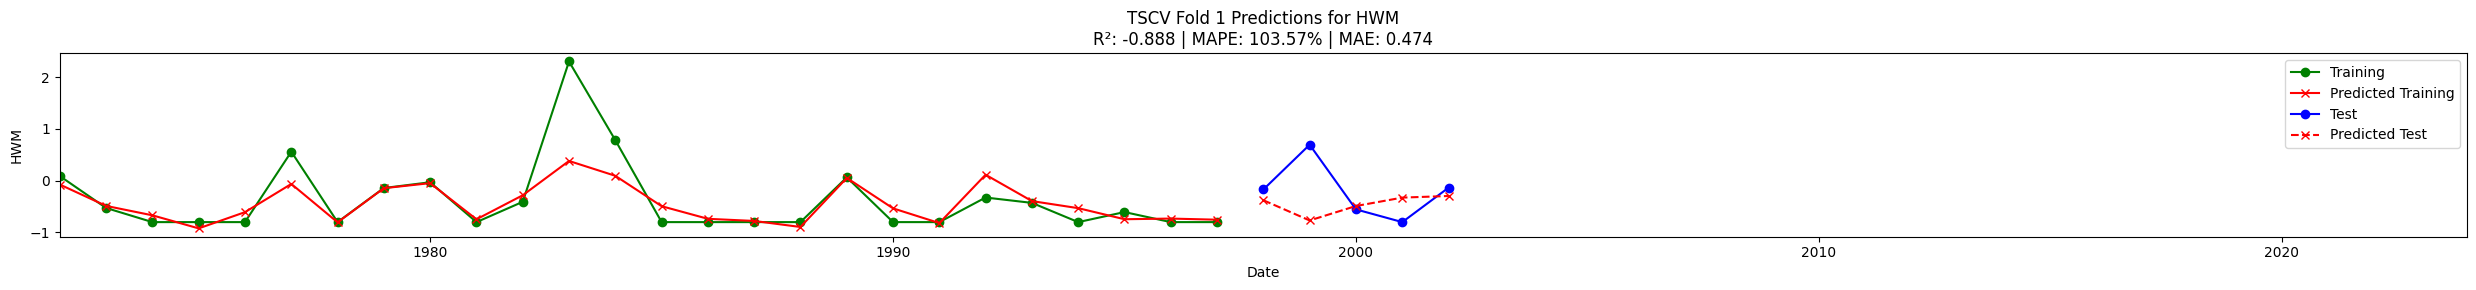

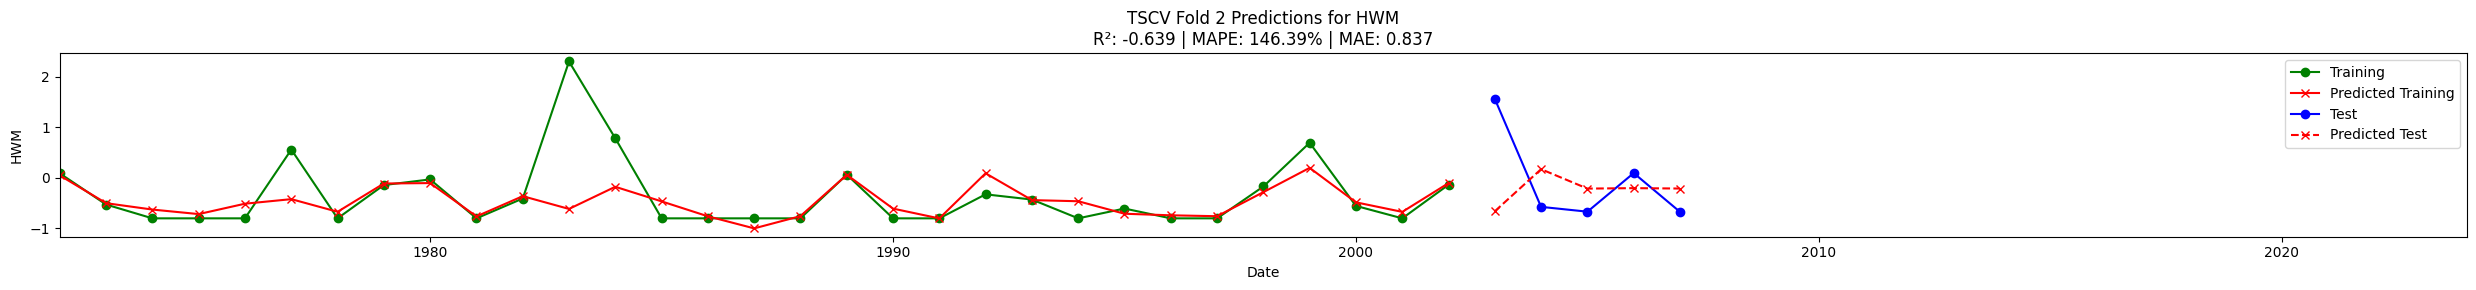

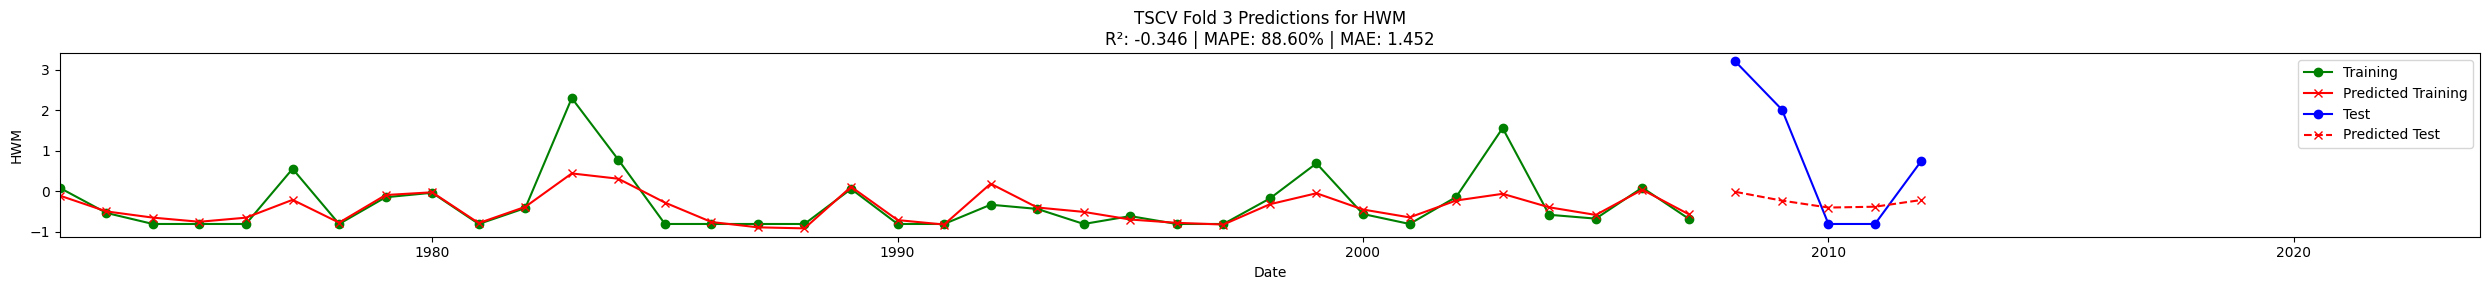

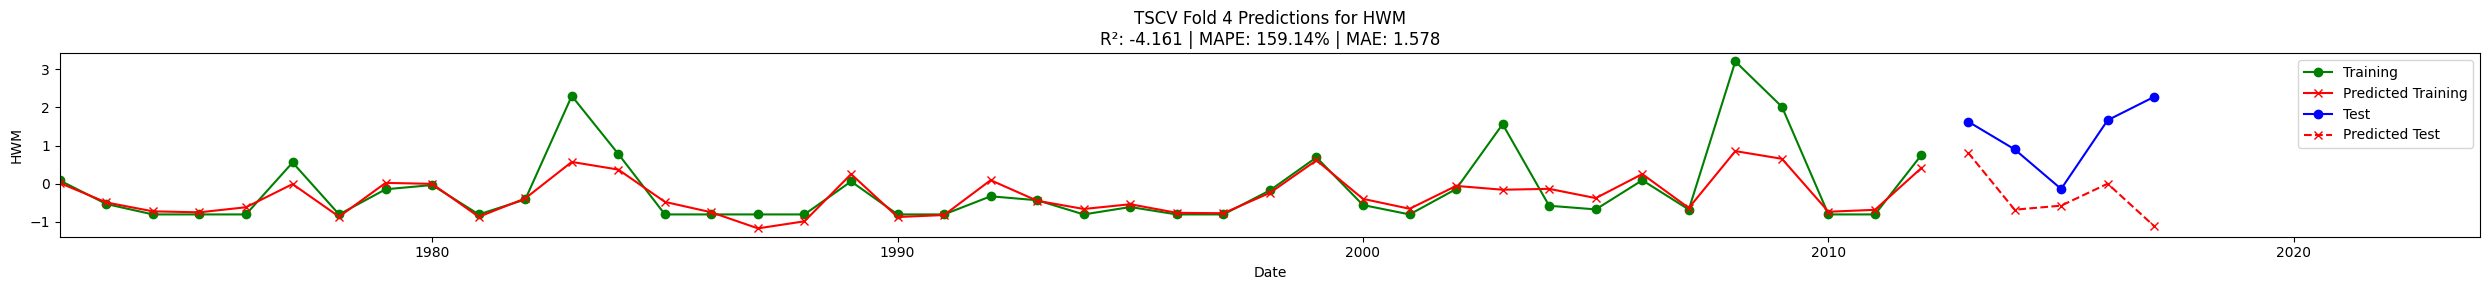

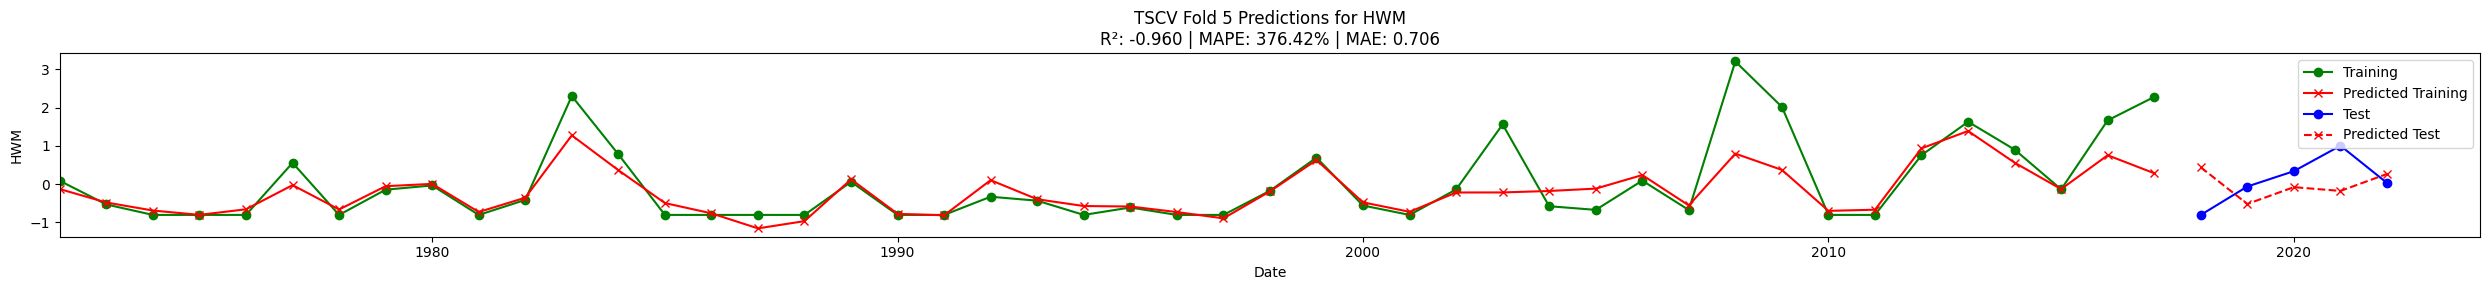

In [7]:
k=0
season = 1
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["CNNRNN16"], 5, id)
    experiment_1.execute_experiment(label_plot="HWM")

### February

In [8]:
ids_to_execute = ["311dd366"]
season = 2
label = "HWM"
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

filename   method rolling variables   
id                                                            
fde0e327  index_fde0e327.parquet     anom       1       SST  \
340e2882  index_340e2882.parquet     anom       1       SST   
8c5bce37  index_8c5bce37.parquet     anom       1         T   
880b8b63  index_880b8b63.parquet      max       1       MSL   
aa75d48e  index_aa75d48e.parquet     anom       1         U   
88249a81  index_88249a81.parquet     anom       1       MSL   
f6e4a28a  index_f6e4a28a.parquet     anom       1       MSL   
7728bf70  index_7728bf70.parquet     anom       1       MSL   
a66b8219  index_a66b8219.parquet     anom       1       MSL   
285aed8e  index_285aed8e.parquet     anom       1       ADV   
59f835e4  index_59f835e4.parquet     anom       1       ADV   
PDO                      pdo.dat      EOF       1   SSTAnom   
ONI                      oni.txt     Anom       3       SST   
SAM                      sam.txt  DifAnom       1       SLP   
DMI                     dmi.data     Grad       1   SSTAnom   

                              boxes reference_period target_period  
id                                                                  
fde0e327               190|240|-5|5        1980-2010     1972-2022  
340e2882              270|280|-10|0        1980-2010     1972-2022  
8c5bce37            286|288|-42|-33        1980-2010     1972-2022  
880b8b63            260|284|-44|-17            NoRef     1972-2022  
aa75d48e            287|289|-42|-33        1980-2010     1972-2022  
88249a81            286|292|-52|-40        1980-2010     1972-2022  
f6e4a28a          286|288.5|-33|-28        1980-2010     1972-2022  
7728bf70            280|286|-38|-30        1980-2010     1972-2022  
a66b8219            291|295|-38|-30        1980-2010     1972-2022  
285aed8e            282|286|-42|-33        1980-2010     1972-2022  
59f835e4            268|283|-32|-20        1980-2010     1972-2022  
PDO                   110|260|20|70          unknown     1972-2022  
ONI                    190|240|-5|5    30yearsliding     1972-2022  
SAM                     X|X|-65|-40        1981-2010     1972-2022  
DMI       50|70|-10|10;90|110|-10|0        1991-2020     1972-2022

Executing 311dd366 iter 1
2/2 [==============================] - 0s 3ms/step


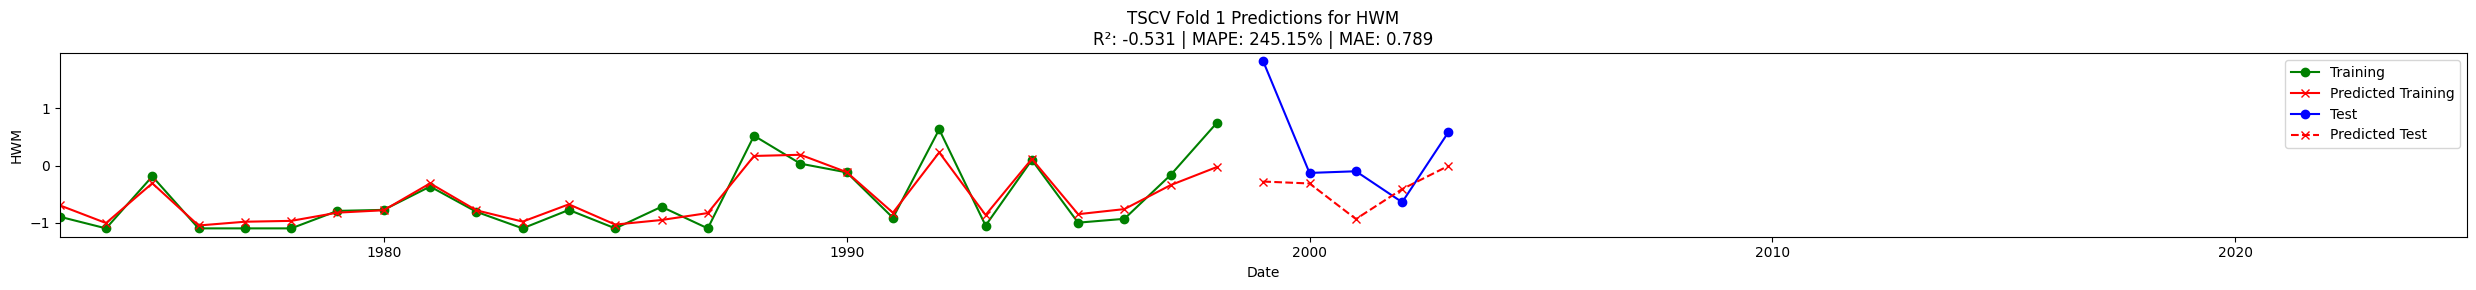

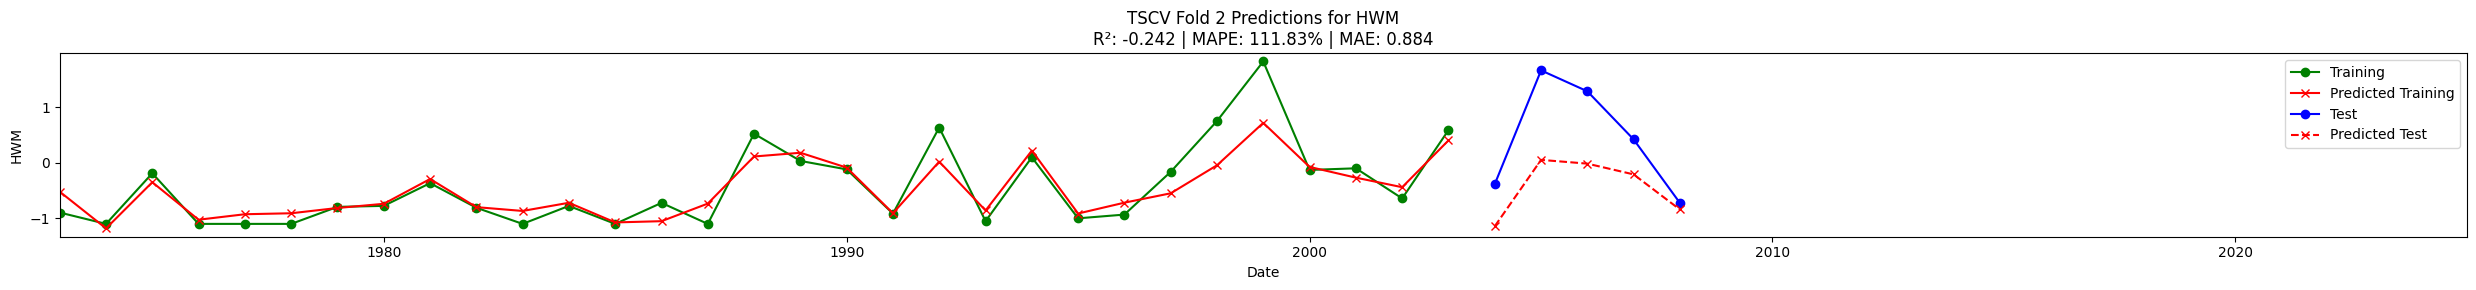

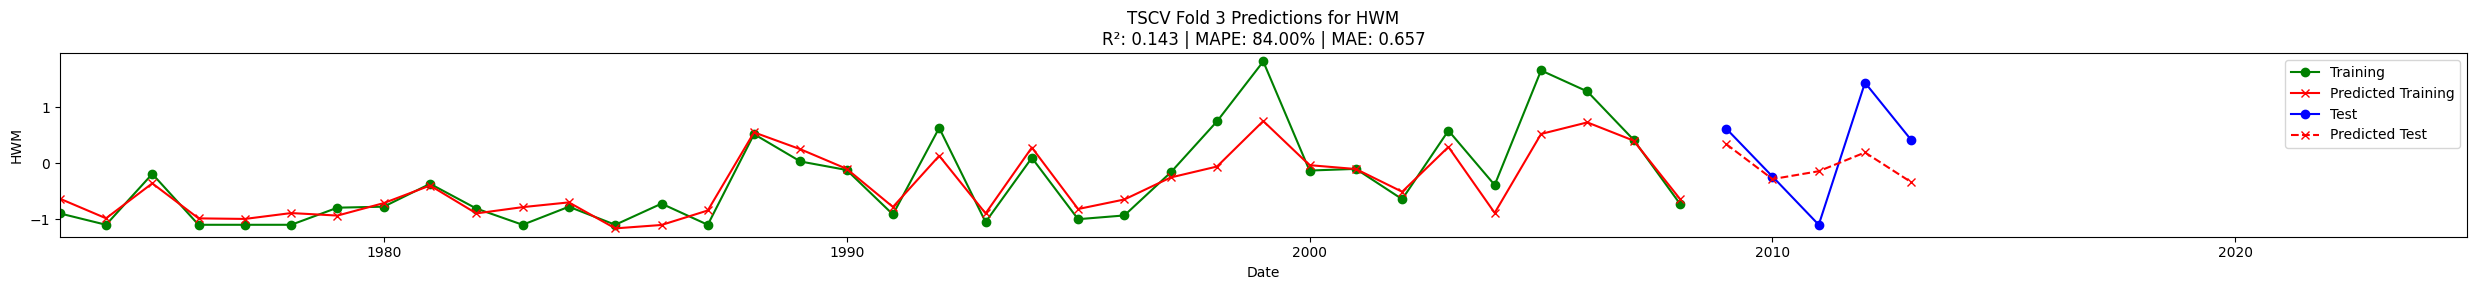

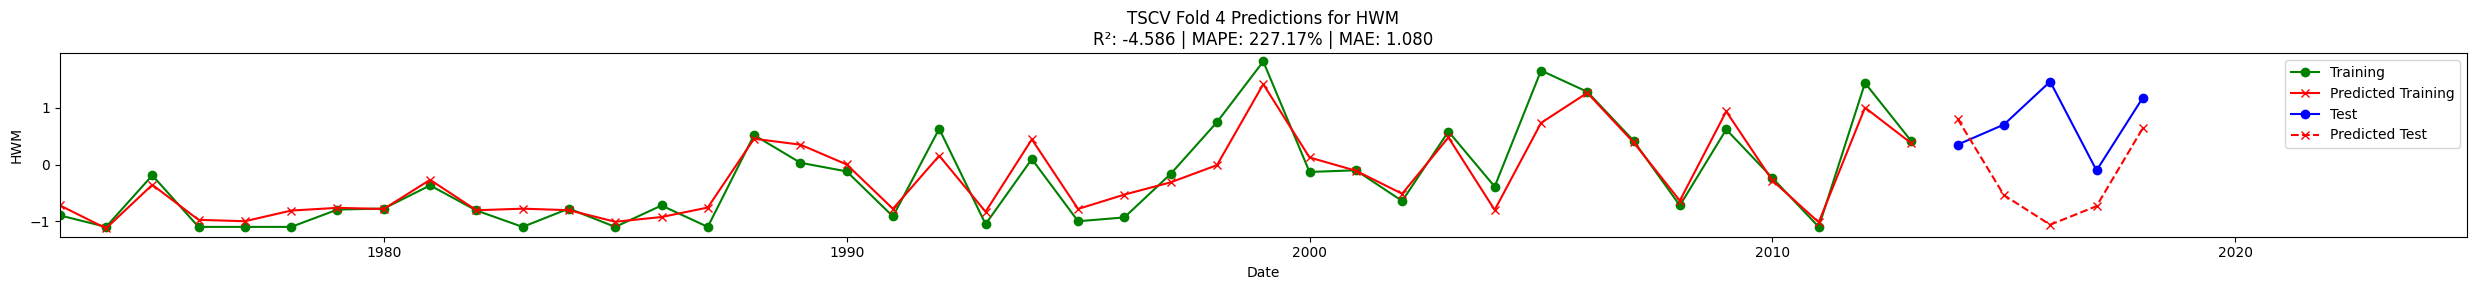

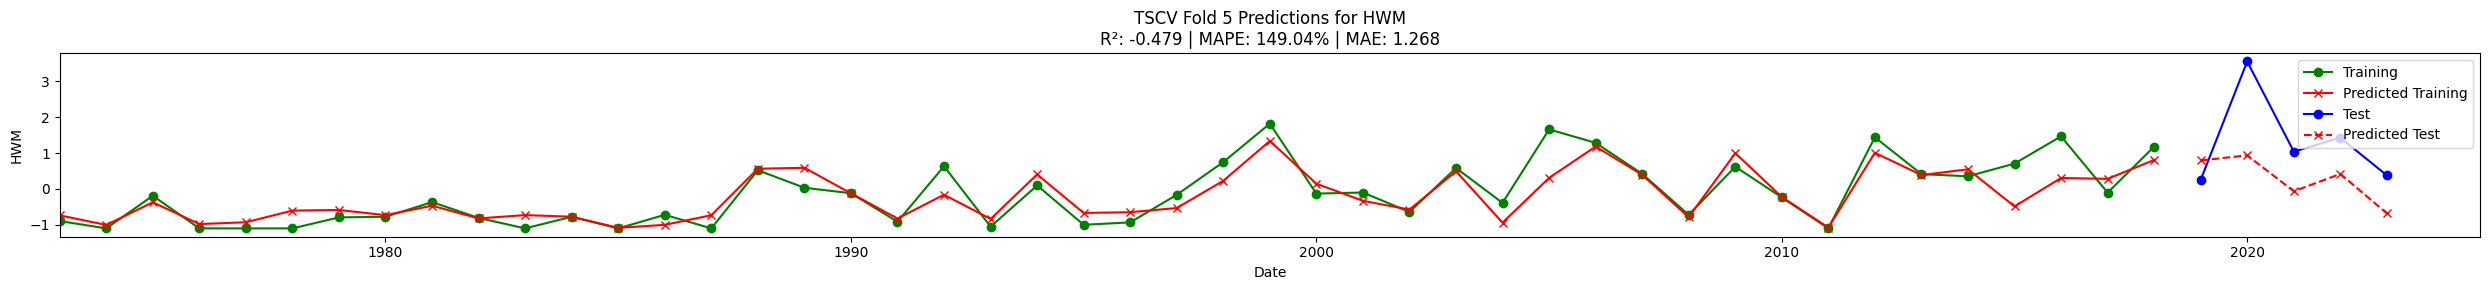

In [9]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        LSTM(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["CNNLSTM16"], 5, id)
    experiment_1.execute_experiment(label_plot=label)

### March

In [10]:
ids_to_execute = ["4effa258"]
season = 3
label = "HWD"
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

filename   method rolling variables   
id                                                            
fde0e327  index_fde0e327.parquet     anom       1       SST  \
340e2882  index_340e2882.parquet     anom       1       SST   
a5df415f  index_a5df415f.parquet      max       1       MSL   
c6184040  index_c6184040.parquet     anom       1         U   
c1c59e4d  index_c1c59e4d.parquet     anom       1         U   
8c4a4c9c  index_8c4a4c9c.parquet     anom       1         U   
cb76aaa7  index_cb76aaa7.parquet     anom       1         U   
d416bd24  index_d416bd24.parquet     anom       1         U   
b259d0dd  index_b259d0dd.parquet     anom       1       MSL   
a15e4d0f  index_a15e4d0f.parquet     anom       1       MSL   
1223f1f4  index_1223f1f4.parquet     anom       1       MSL   
0d0d4c54  index_0d0d4c54.parquet     anom       1       MSL   
dadf178c  index_dadf178c.parquet      max       1       MSL   
ee1c472f  index_ee1c472f.parquet      max       1       MSL   
f4577f2a  index_f4577f2a.parquet      max       1       MSL   
PDO                      pdo.dat      EOF       1   SSTAnom   
ONI                      oni.txt     Anom       3       SST   
SAM                      sam.txt  DifAnom       1       SLP   
DMI                     dmi.data     Grad       1   SSTAnom   

                              boxes reference_period target_period  
id                                                                  
fde0e327               190|240|-5|5        1980-2010     1972-2022  
340e2882              270|280|-10|0        1980-2010     1972-2022  
a5df415f            245|284|-45|-15        1980-2010     1972-2022  
c6184040            282|289|-34|-30        1980-2010     1972-2022  
c1c59e4d          289|290.5|-34|-30        1980-2010     1972-2022  
8c4a4c9c            282|289|-38|-34        1980-2010     1972-2022  
cb76aaa7          282|288.5|-43|-38        1980-2010     1972-2022  
d416bd24          282|288.5|-53|-43        1980-2010     1972-2022  
b259d0dd          282|290.5|-34|-30        1980-2010     1972-2022  
a15e4d0f            282|289|-38|-34        1980-2010     1972-2022  
1223f1f4          282|288.5|-43|-38        1980-2010     1972-2022  
0d0d4c54          282|288.5|-53|-43        1980-2010     1972-2022  
dadf178c            282|292|-34|-30        1980-2010     1972-2022  
ee1c472f            282|292|-38|-34        1980-2010     1972-2022  
f4577f2a            282|292|-43|-38        1980-2010     1972-2022  
PDO                   110|260|20|70          unknown     1972-2022  
ONI                    190|240|-5|5    30yearsliding     1972-2022  
SAM                     X|X|-65|-40        1981-2010     1972-2022  
DMI       50|70|-10|10;90|110|-10|0        1991-2020     1972-2022

Executing 4effa258 iter 1
2/2 [==============================] - 0s 3ms/step


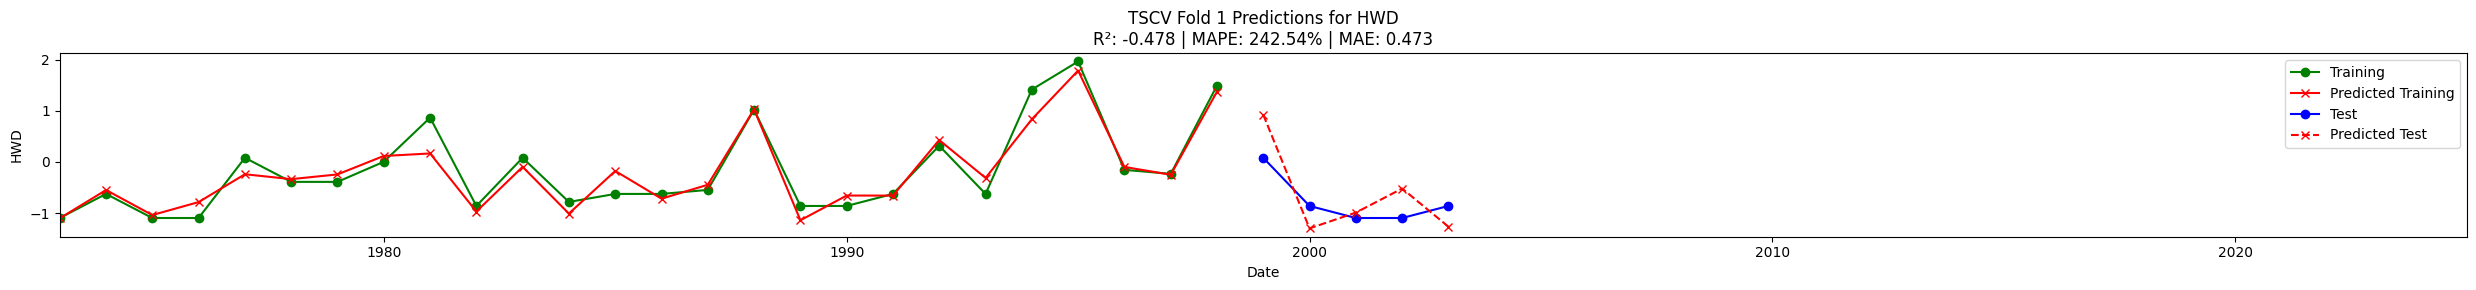

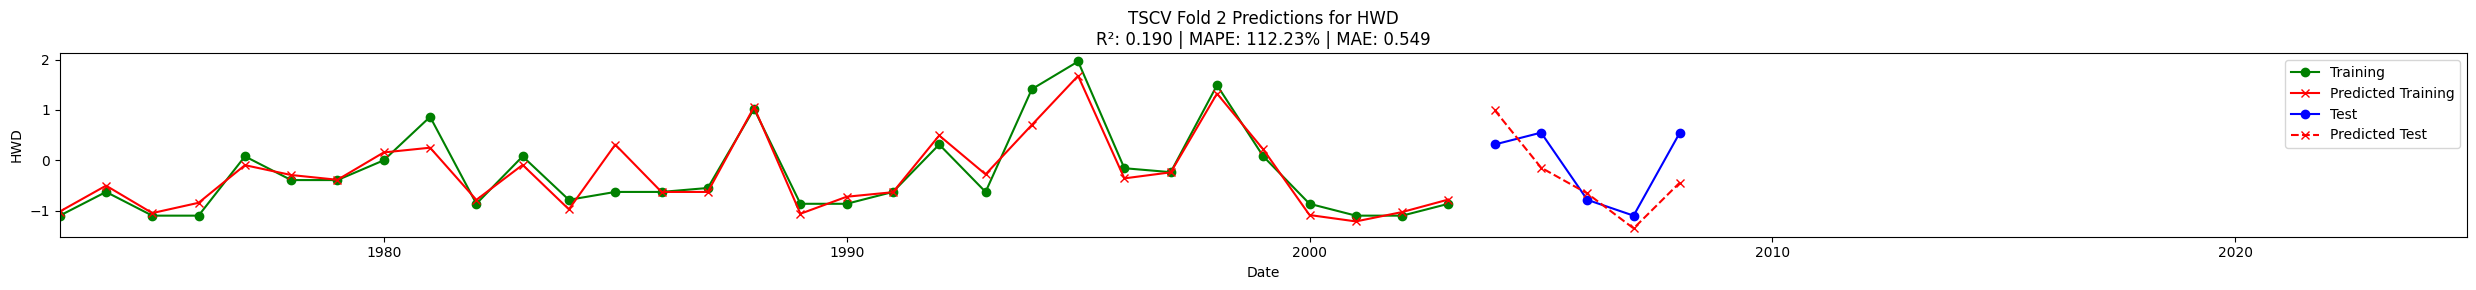

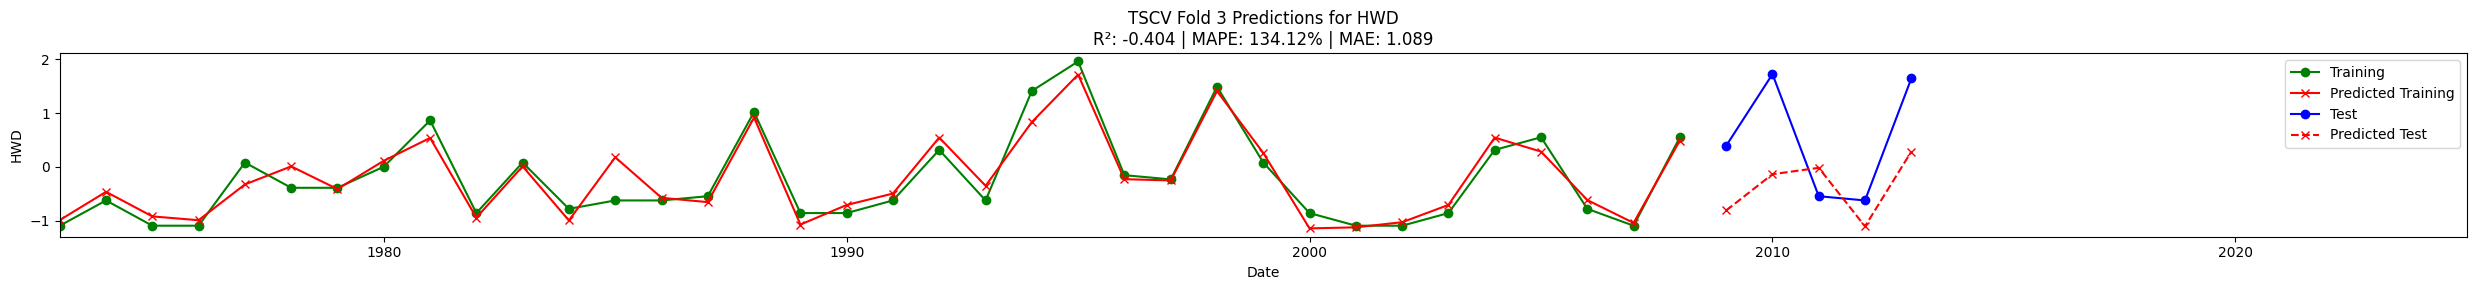

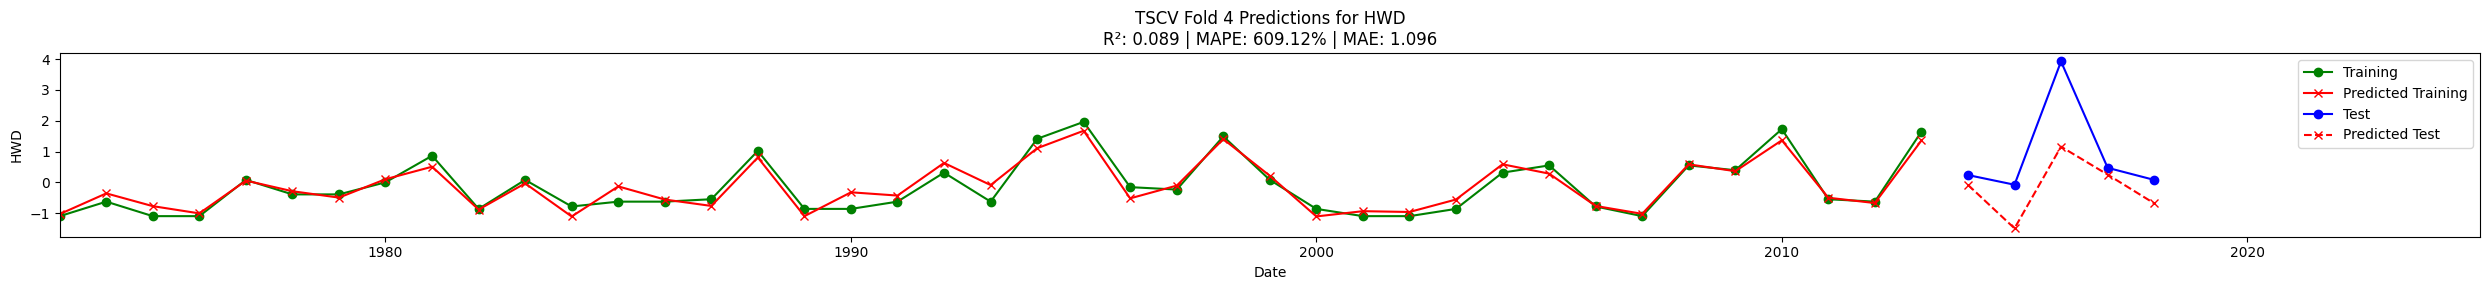

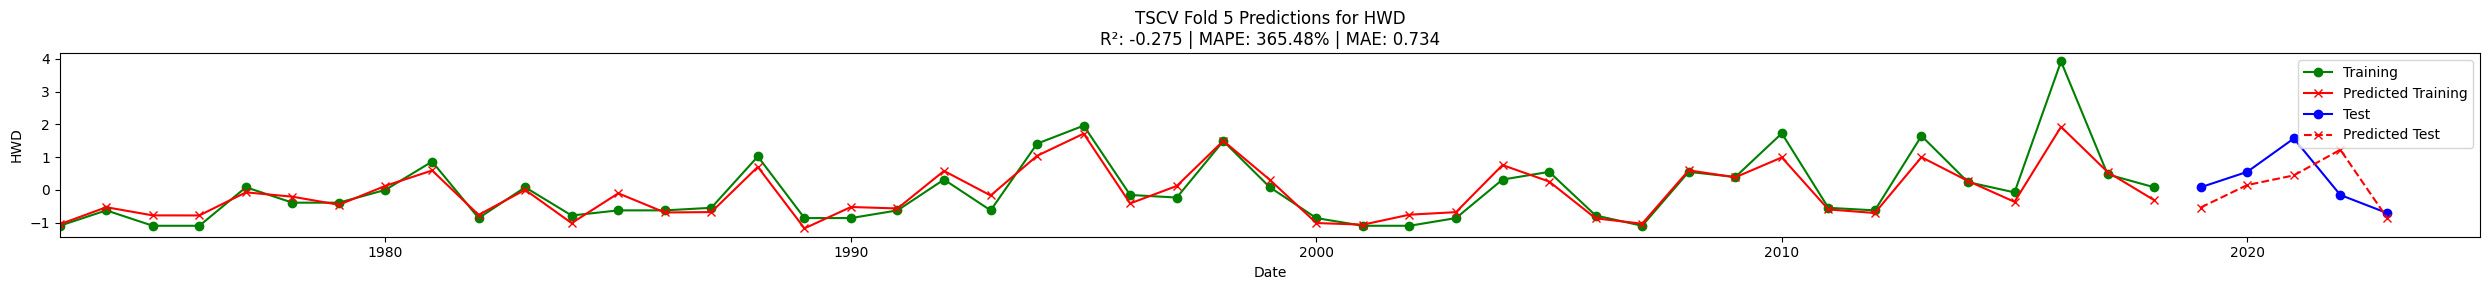

In [11]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        SimpleRNN(16, activation="tanh", return_sequences=True, input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["SRNN16"], 5, id)
    experiment_1.execute_experiment(label_plot=label)

### April

In [12]:
ids_to_execute = ["b33fc639"]
season = 4
label = "HWF"
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

filename method rolling variables              boxes   
id                                                                             
fde0e327  index_fde0e327.parquet   anom       1       SST       190|240|-5|5  \
340e2882  index_340e2882.parquet   anom       1       SST      270|280|-10|0   
b91ccd4e  index_b91ccd4e.parquet    max       1       MSL    245|284|-45|-15   
c6184040  index_c6184040.parquet   anom       1         U    282|289|-34|-30   
c1c59e4d  index_c1c59e4d.parquet   anom       1         U  289|290.5|-34|-30   
8c4a4c9c  index_8c4a4c9c.parquet   anom       1         U    282|289|-38|-34   
cb76aaa7  index_cb76aaa7.parquet   anom       1         U  282|288.5|-43|-38   
d416bd24  index_d416bd24.parquet   anom       1         U  282|288.5|-53|-43   
b259d0dd  index_b259d0dd.parquet   anom       1       MSL  282|290.5|-34|-30   
a15e4d0f  index_a15e4d0f.parquet   anom       1       MSL    282|289|-38|-34   
1223f1f4  index_1223f1f4.parquet   anom       1       MSL  282|288.5|-43|-38   
0d0d4c54  index_0d0d4c54.parquet   anom       1       MSL  282|288.5|-53|-43   

         reference_period target_period  
id                                       
fde0e327        1980-2010     1972-2022  
340e2882        1980-2010     1972-2022  
b91ccd4e            NoRef     1972-2022  
c6184040        1980-2010     1972-2022  
c1c59e4d        1980-2010     1972-2022  
8c4a4c9c        1980-2010     1972-2022  
cb76aaa7        1980-2010     1972-2022  
d416bd24        1980-2010     1972-2022  
b259d0dd        1980-2010     1972-2022  
a15e4d0f        1980-2010     1972-2022  
1223f1f4        1980-2010     1972-2022  
0d0d4c54        1980-2010     1972-2022

Executing b33fc639 iter 1
2/2 [==============================] - 0s 3ms/step


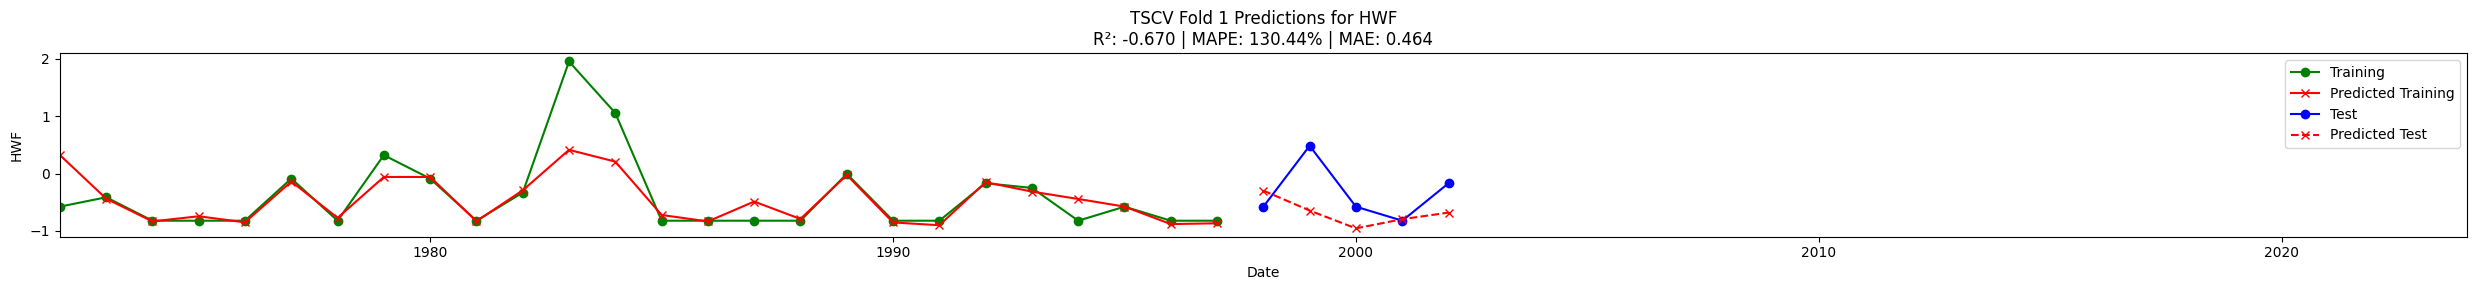

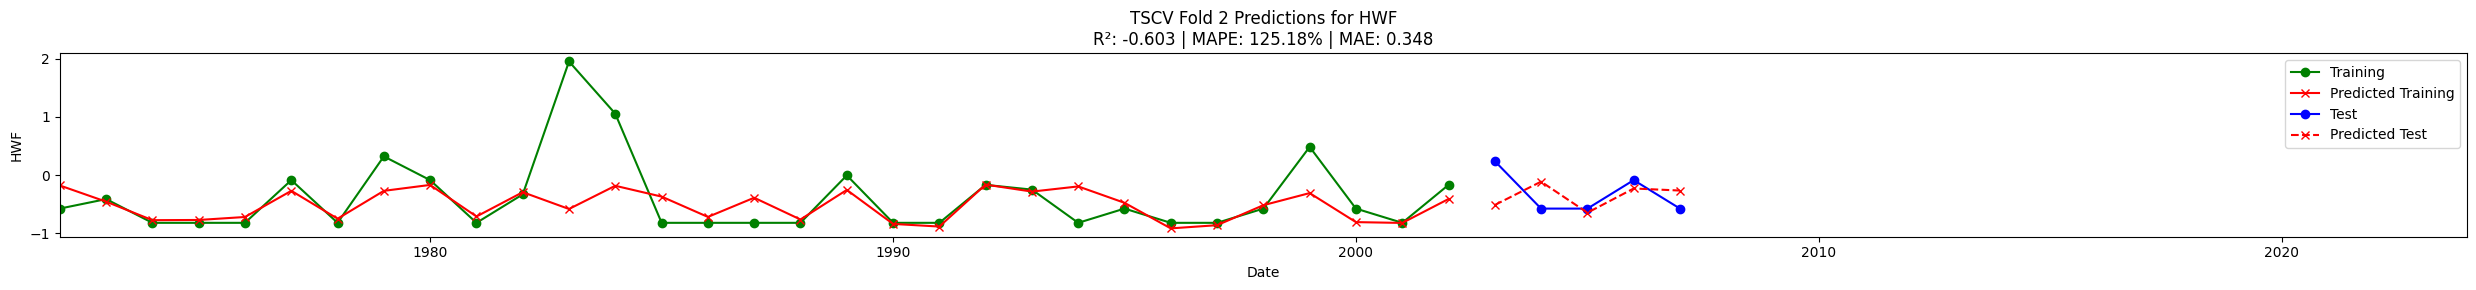

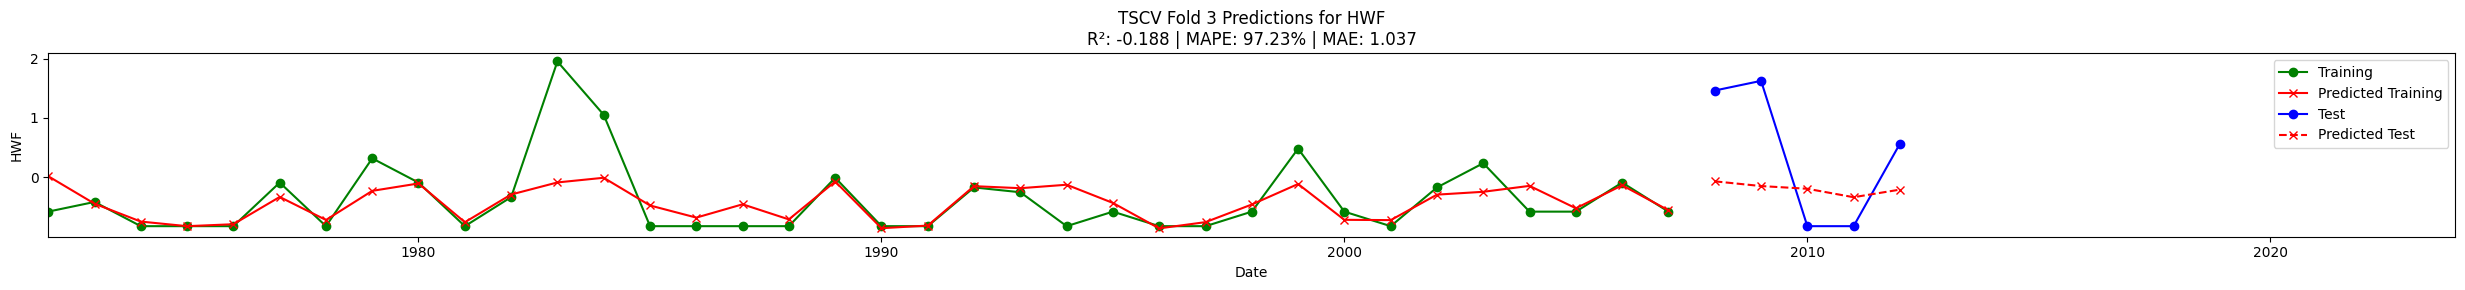

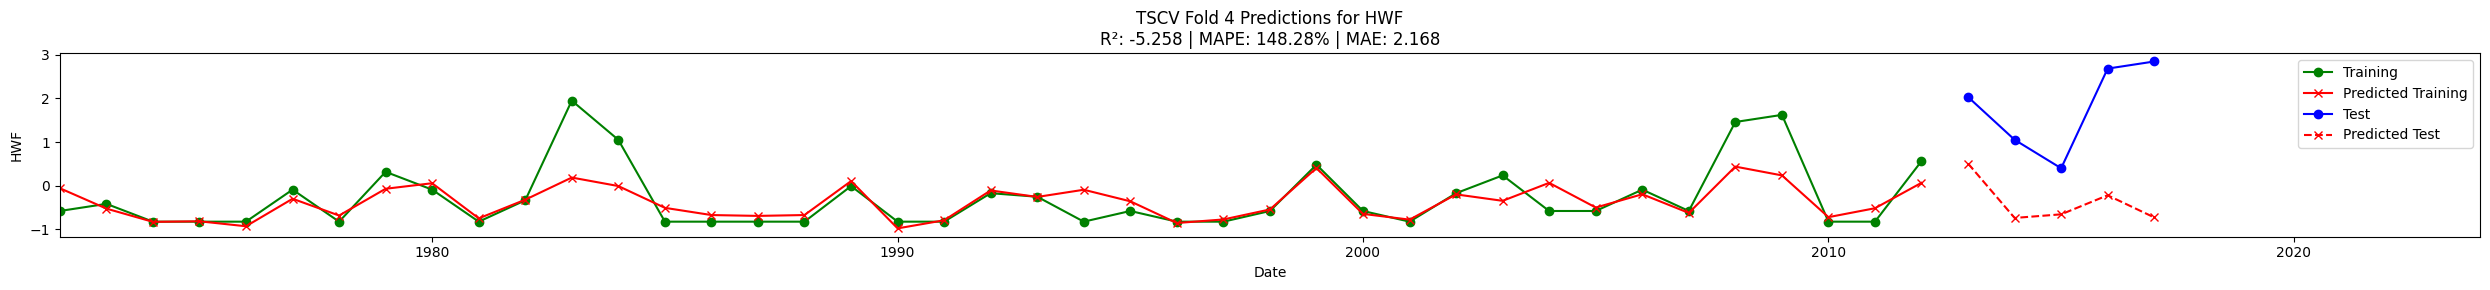

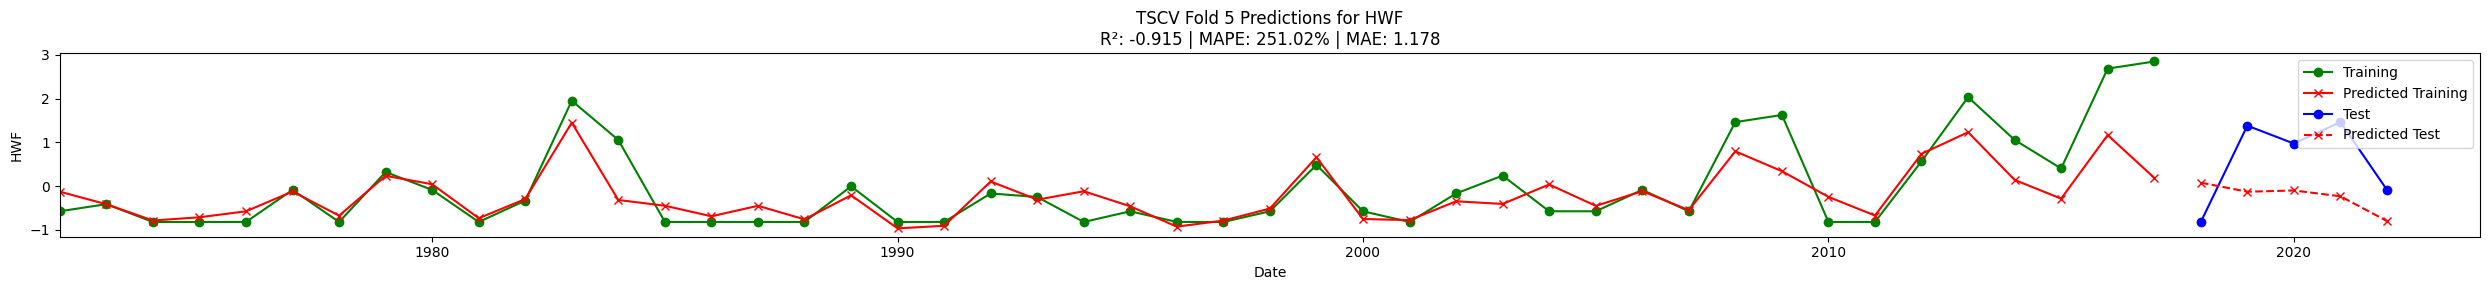

In [13]:
k=0
season = 1
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
    LSTM(16, activation="tanh", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
    Dropout(0.1),  # Regularization
    Dense(8, activation="relu"),
    Dense(len(indices_of_interest))  # Predict 5 indices
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["LSTM16"], 5, id)
    experiment_1.execute_experiment(label_plot=label)

### May

In [14]:
ids_to_execute = ["458d357c"]
season = 5
label = "HWD"
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

filename   method rolling variables   
id                                                            
32f131d2  index_32f131d2.parquet     anom       1       SST  \
69ffcfa8  index_69ffcfa8.parquet     anom       1       SST   
4af95abb  index_4af95abb.parquet     anom       1         T   
4a86cb22  index_4a86cb22.parquet      max       1       MSL   
52eda853  index_52eda853.parquet     anom       1         U   
3bcb0703  index_3bcb0703.parquet     anom       1         U   
1c12658a  index_1c12658a.parquet     anom       1       MSL   
3c2a06b5  index_3c2a06b5.parquet     anom       1       MSL   
c7744922  index_c7744922.parquet     anom       1       MSL   
3e97f7f5  index_3e97f7f5.parquet     anom       1       MSL   
57c4c65d  index_57c4c65d.parquet     anom       1       ADV   
8f223d89  index_8f223d89.parquet     anom       1       ADV   
PDO                      pdo.dat      EOF       1   SSTAnom   
ONI                      oni.txt     Anom       3       SST   
SAM                      sam.txt  DifAnom       1       SLP   
DMI                     dmi.data     Grad       1   SSTAnom   

                              boxes reference_period target_period  
id                                                                  
32f131d2               190|240|-5|5        1980-2010     1972-2022  
69ffcfa8              270|280|-10|0        1980-2010     1972-2022  
4af95abb            286|288|-42|-33        1980-2010     1972-2022  
4a86cb22            260|284|-44|-17        1980-2010     1972-2022  
52eda853        287.5|289.5|-37|-33        1980-2010     1972-2022  
3bcb0703        286.5|288.5|-42|-37        1980-2010     1972-2022  
1c12658a            286|292|-52|-40        1980-2010     1972-2022  
3c2a06b5          286|288.5|-33|-28        1980-2010     1972-2022  
c7744922            280|286|-38|-30        1980-2010     1972-2022  
3e97f7f5            291|295|-38|-30        1980-2010     1972-2022  
57c4c65d            282|286|-42|-33        1980-2010     1972-2022  
8f223d89            268|283|-32|-20        1980-2010     1972-2022  
PDO                   110|260|20|70          unknown     1972-2022  
ONI                    190|240|-5|5    30yearsliding     1972-2022  
SAM                     X|X|-65|-40        1981-2010     1972-2022  
DMI       50|70|-10|10;90|110|-10|0        1991-2020     1972-2022

Executing 458d357c iter 1
2/2 [==============================] - 0s 4ms/step


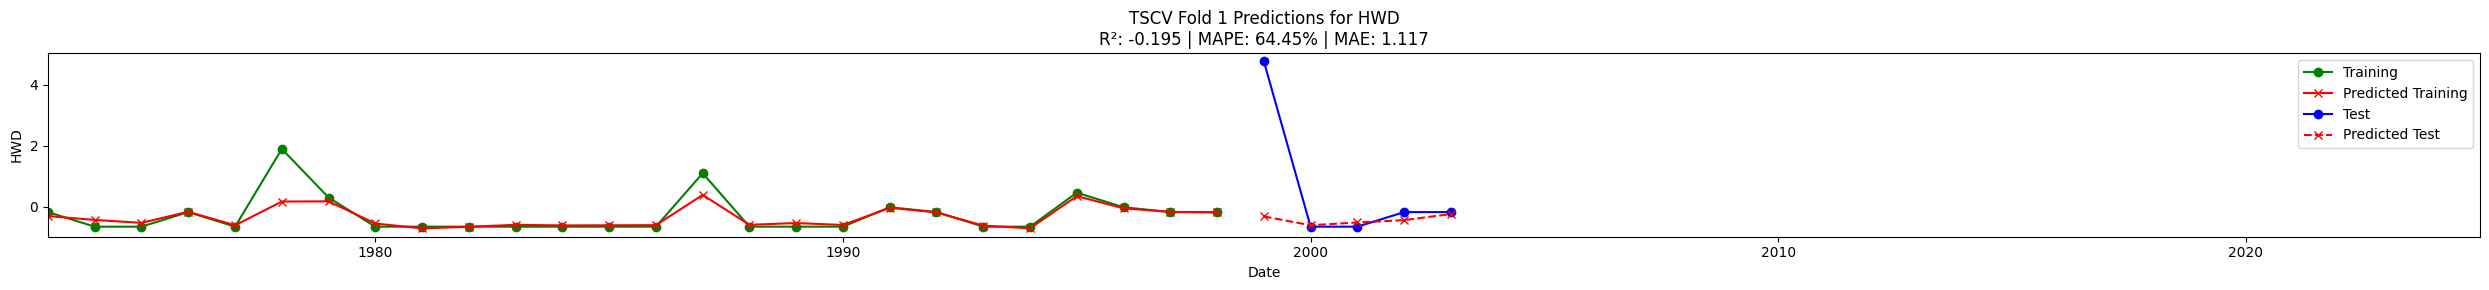

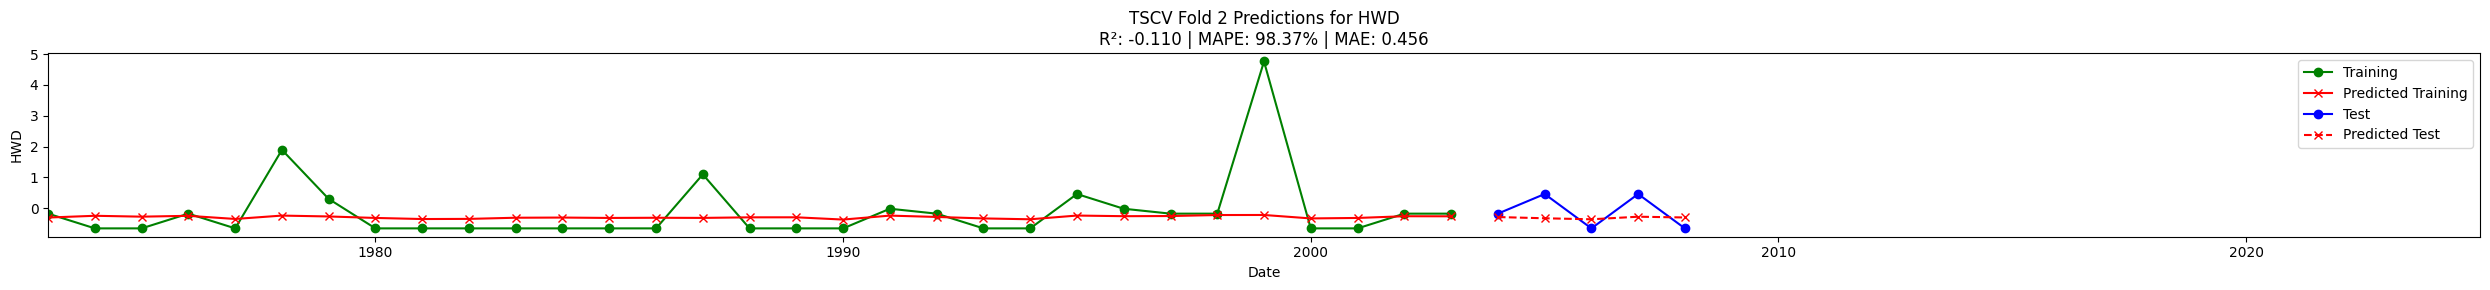

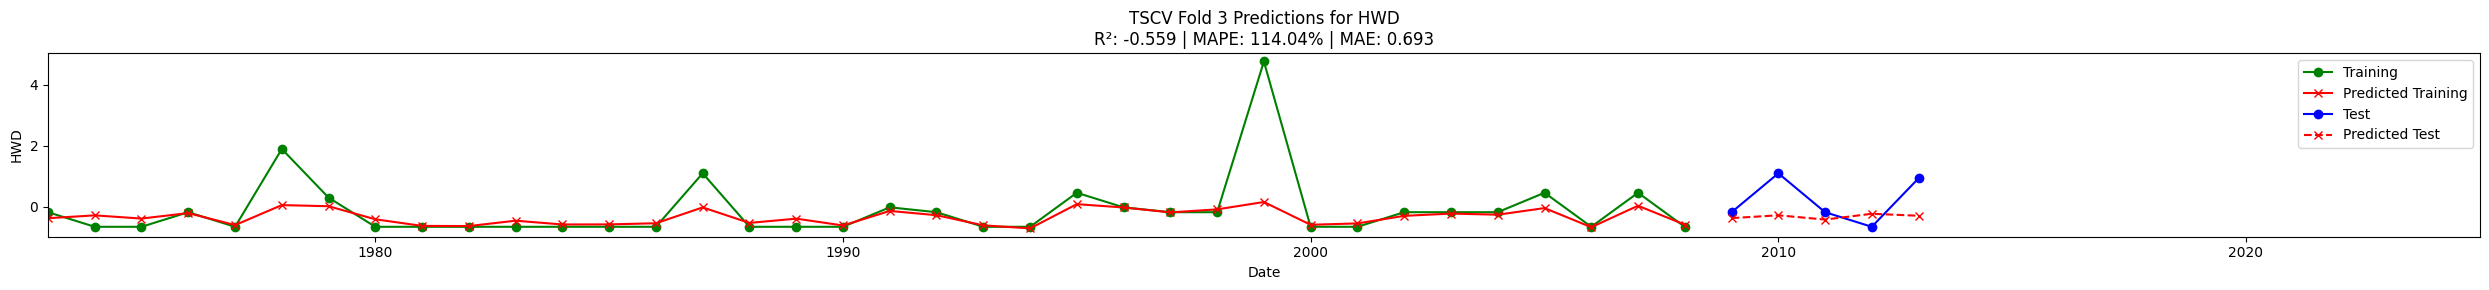

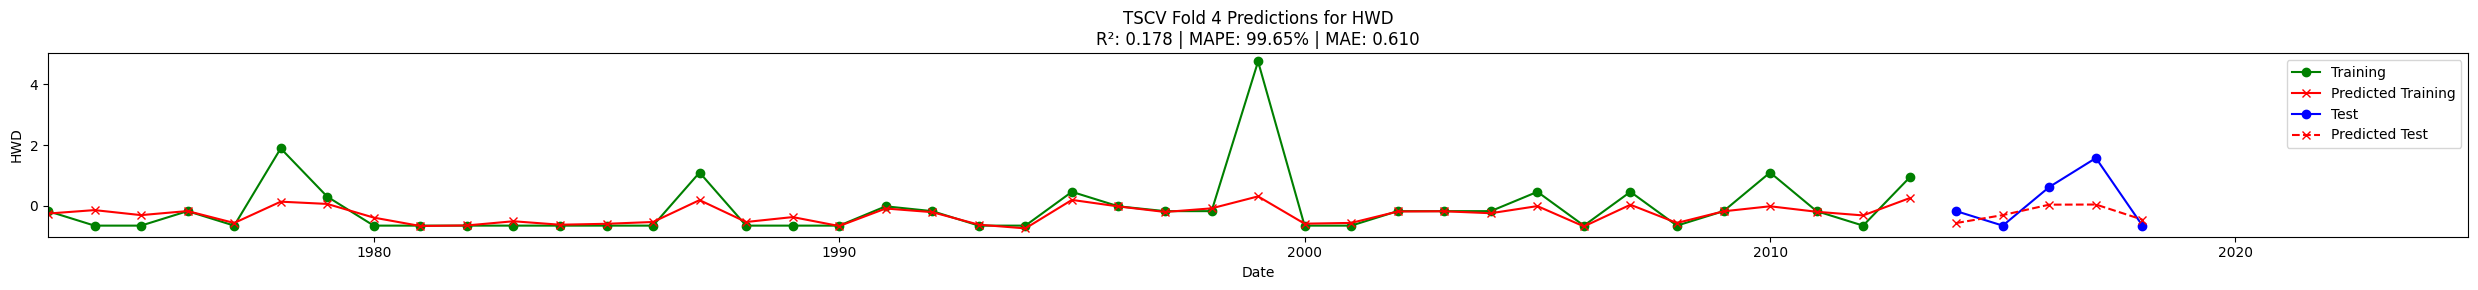

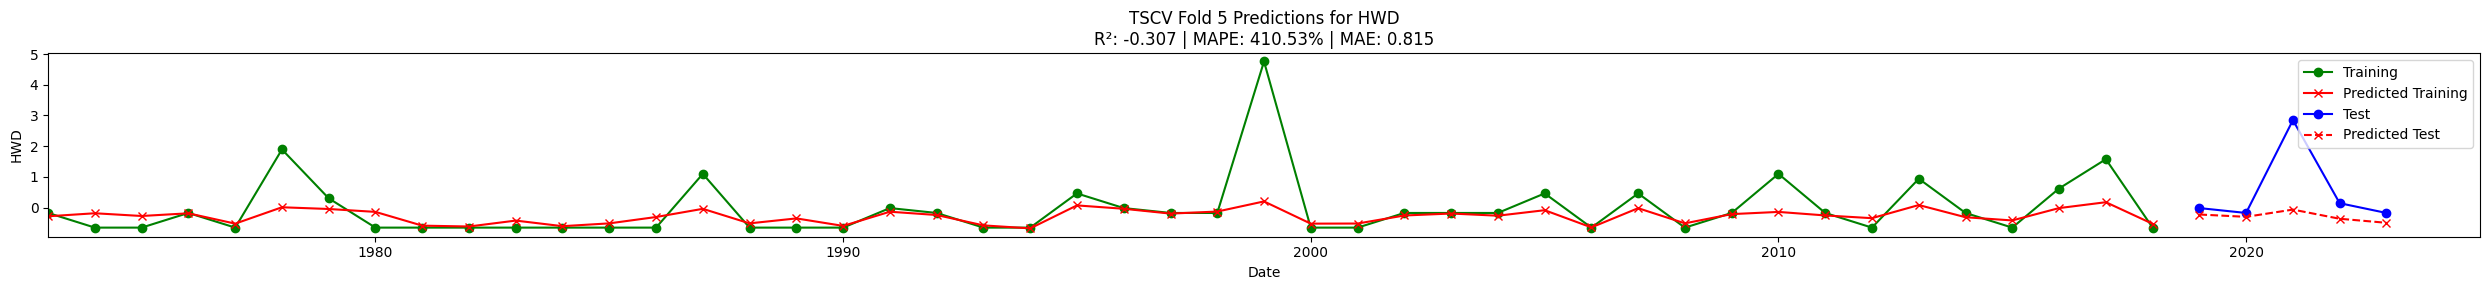

In [15]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        LSTM(16, activation="tanh", return_sequences=True, input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        LSTM(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["LSTM16"], 5, id)
    experiment_1.execute_experiment(label_plot=label)

### June

In [16]:
ids_to_execute = ["d7101242"]
season = 6
label = "HWD"
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

filename   method rolling variables   
id                                                            
fde0e327  index_fde0e327.parquet     anom       1       SST  \
340e2882  index_340e2882.parquet     anom       1       SST   
13e2f761  index_13e2f761.parquet      max       1       MSL   
aa75d48e  index_aa75d48e.parquet     anom       1         U   
2748fd3a  index_2748fd3a.parquet     anom       1       MSL   
f6e4a28a  index_f6e4a28a.parquet     anom       1       MSL   
7728bf70  index_7728bf70.parquet     anom       1       MSL   
a66b8219  index_a66b8219.parquet     anom       1       MSL   
PDO                      pdo.dat      EOF       1   SSTAnom   
ONI                      oni.txt     Anom       3       SST   
SAM                      sam.txt  DifAnom       1       SLP   
DMI                     dmi.data     Grad       1   SSTAnom   

                              boxes reference_period target_period  
id                                                                  
fde0e327               190|240|-5|5        1980-2010     1972-2022  
340e2882              270|280|-10|0        1980-2010     1972-2022  
13e2f761            260|284|-55|-25            NoRef     1972-2022  
aa75d48e            287|289|-42|-33        1980-2010     1972-2022  
2748fd3a            290|295|-42|-33        1980-2010     1972-2022  
f6e4a28a          286|288.5|-33|-28        1980-2010     1972-2022  
7728bf70            280|286|-38|-30        1980-2010     1972-2022  
a66b8219            291|295|-38|-30        1980-2010     1972-2022  
PDO                   110|260|20|70          unknown     1972-2022  
ONI                    190|240|-5|5    30yearsliding     1972-2022  
SAM                     X|X|-65|-40        1981-2010     1972-2022  
DMI       50|70|-10|10;90|110|-10|0        1991-2020     1972-2022

Executing d7101242 iter 1
2/2 [==============================] - 0s 2ms/step


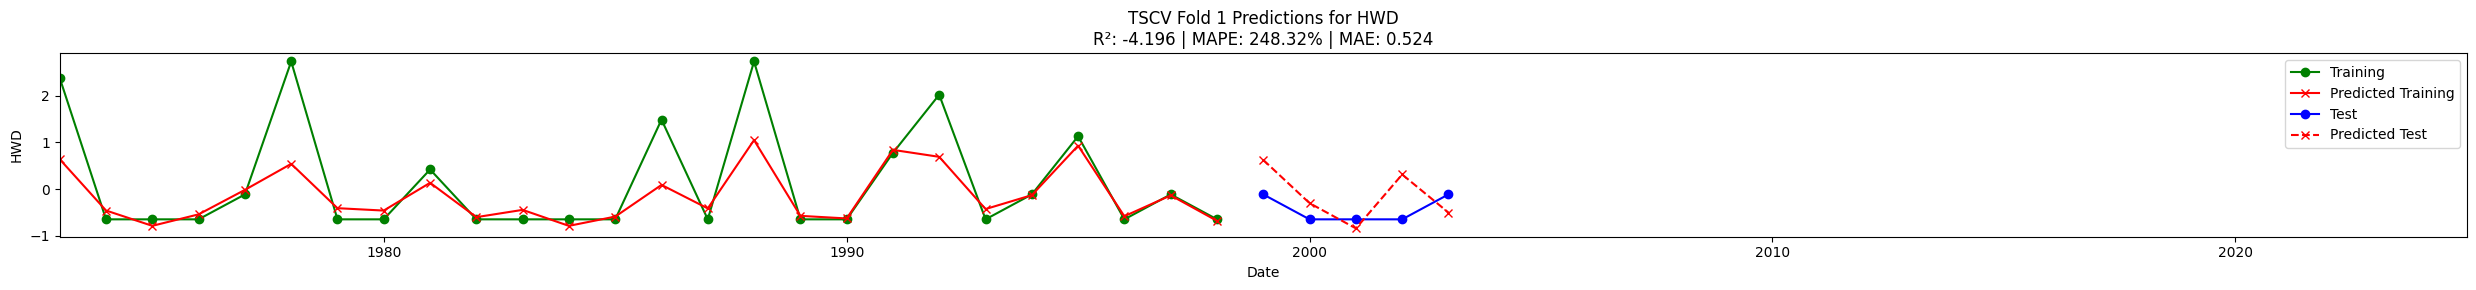

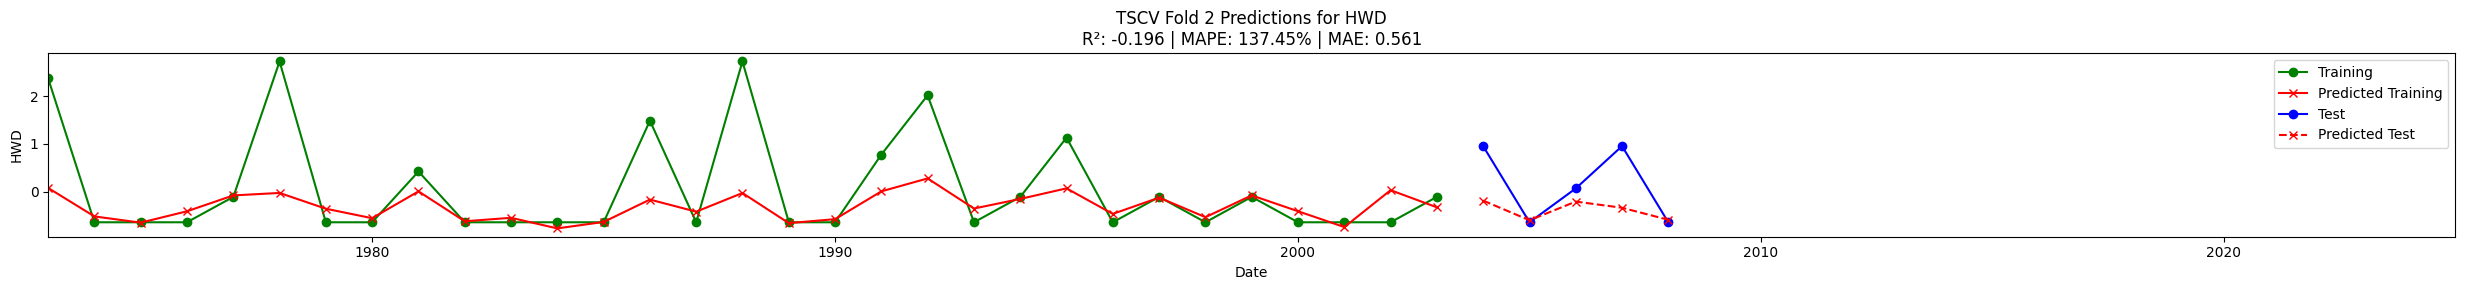

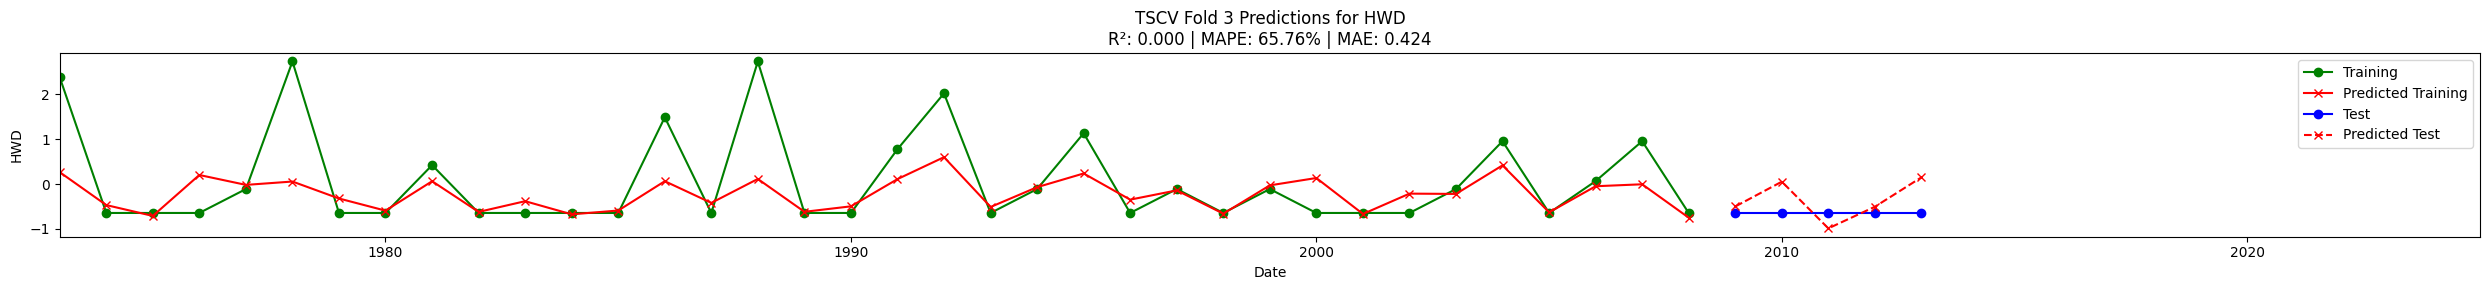

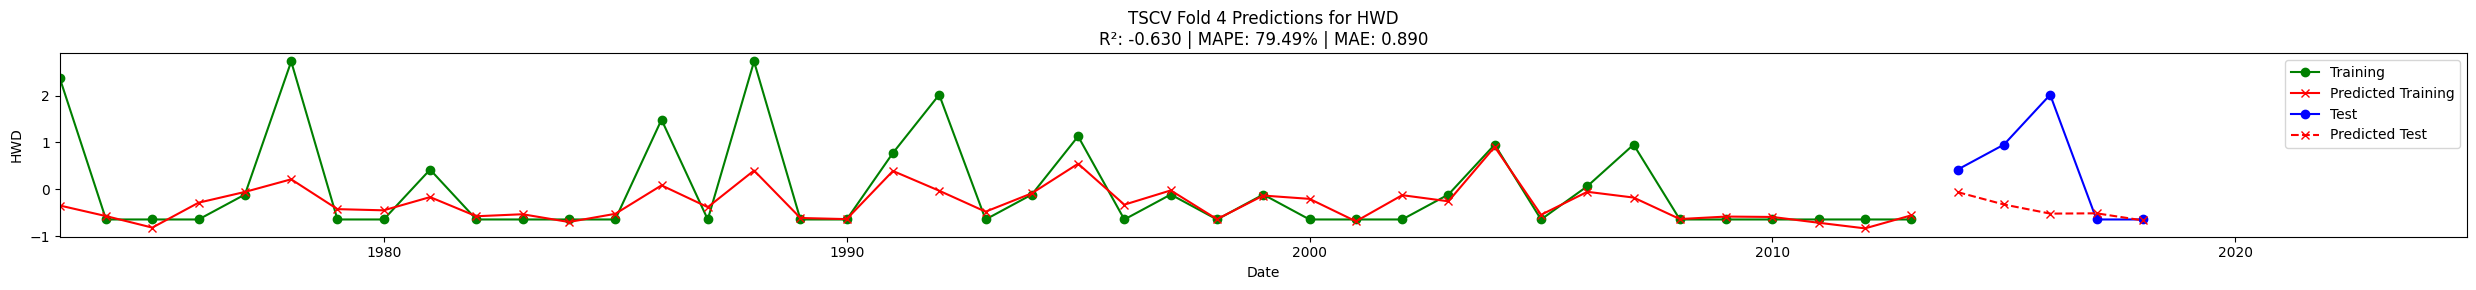

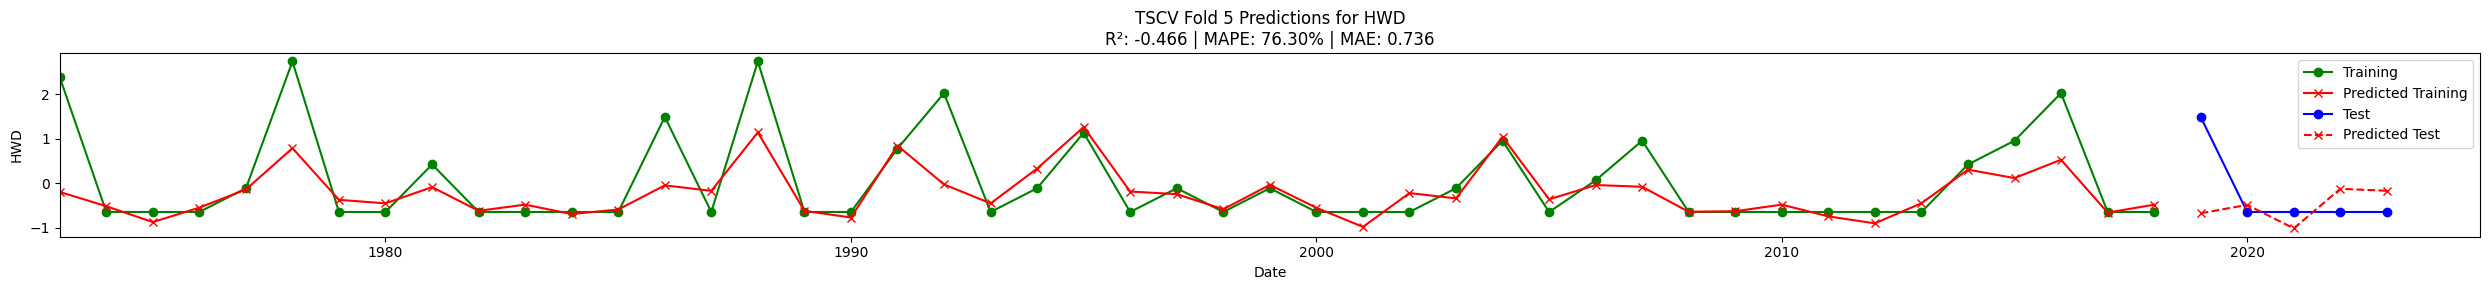

In [17]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
    SimpleRNN(16, activation="tanh", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
    Dropout(0.1),  # Regularization
    Dense(8, activation="relu"),
    Dense(len(indices_of_interest))  # Predict 5 indices
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["RNN16"], 5, id)
    experiment_1.execute_experiment(label_plot=label)

### July

In [18]:
ids_to_execute = ["9bd58418"]
season = 7
label = "HWD"
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

filename   method rolling variables   
id                                                            
fde0e327  index_fde0e327.parquet     anom       1       SST  \
340e2882  index_340e2882.parquet     anom       1       SST   
b91ccd4e  index_b91ccd4e.parquet      max       1       MSL   
c6184040  index_c6184040.parquet     anom       1         U   
c1c59e4d  index_c1c59e4d.parquet     anom       1         U   
8c4a4c9c  index_8c4a4c9c.parquet     anom       1         U   
cb76aaa7  index_cb76aaa7.parquet     anom       1         U   
d416bd24  index_d416bd24.parquet     anom       1         U   
b259d0dd  index_b259d0dd.parquet     anom       1       MSL   
a15e4d0f  index_a15e4d0f.parquet     anom       1       MSL   
1223f1f4  index_1223f1f4.parquet     anom       1       MSL   
0d0d4c54  index_0d0d4c54.parquet     anom       1       MSL   
051cd6f3  index_051cd6f3.parquet      max       1       MSL   
422ed1de  index_422ed1de.parquet      max       1       MSL   
39b84026  index_39b84026.parquet      max       1       MSL   
PDO                      pdo.dat      EOF       1   SSTAnom   
ONI                      oni.txt     Anom       3       SST   
SAM                      sam.txt  DifAnom       1       SLP   
DMI                     dmi.data     Grad       1   SSTAnom   
ADV                            -     ADVU       1       U|T   

                              boxes reference_period target_period  
id                                                                  
fde0e327               190|240|-5|5        1980-2010     1972-2022  
340e2882              270|280|-10|0        1980-2010     1972-2022  
b91ccd4e            245|284|-45|-15            NoRef     1972-2022  
c6184040            282|289|-34|-30        1980-2010     1972-2022  
c1c59e4d          289|290.5|-34|-30        1980-2010     1972-2022  
8c4a4c9c            282|289|-38|-34        1980-2010     1972-2022  
cb76aaa7          282|288.5|-43|-38        1980-2010     1972-2022  
d416bd24          282|288.5|-53|-43        1980-2010     1972-2022  
b259d0dd          282|290.5|-34|-30        1980-2010     1972-2022  
a15e4d0f            282|289|-38|-34        1980-2010     1972-2022  
1223f1f4          282|288.5|-43|-38        1980-2010     1972-2022  
0d0d4c54          282|288.5|-53|-43        1980-2010     1972-2022  
051cd6f3            282|292|-34|-30            NoRef     1972-2022  
422ed1de            282|292|-38|-34            NoRef     1972-2022  
39b84026            282|292|-43|-38            NoRef     1972-2022  
PDO                   110|260|20|70          unknown     1972-2022  
ONI                    190|240|-5|5    30yearsliding     1972-2022  
SAM                     X|X|-65|-40        1981-2010     1972-2022  
DMI       50|70|-10|10;90|110|-10|0        1991-2020     1972-2022  
ADV                 282|288|-42|-26            NoRef     1972-2022

Executing 9bd58418 iter 1
2/2 [==============================] - 0s 996us/step


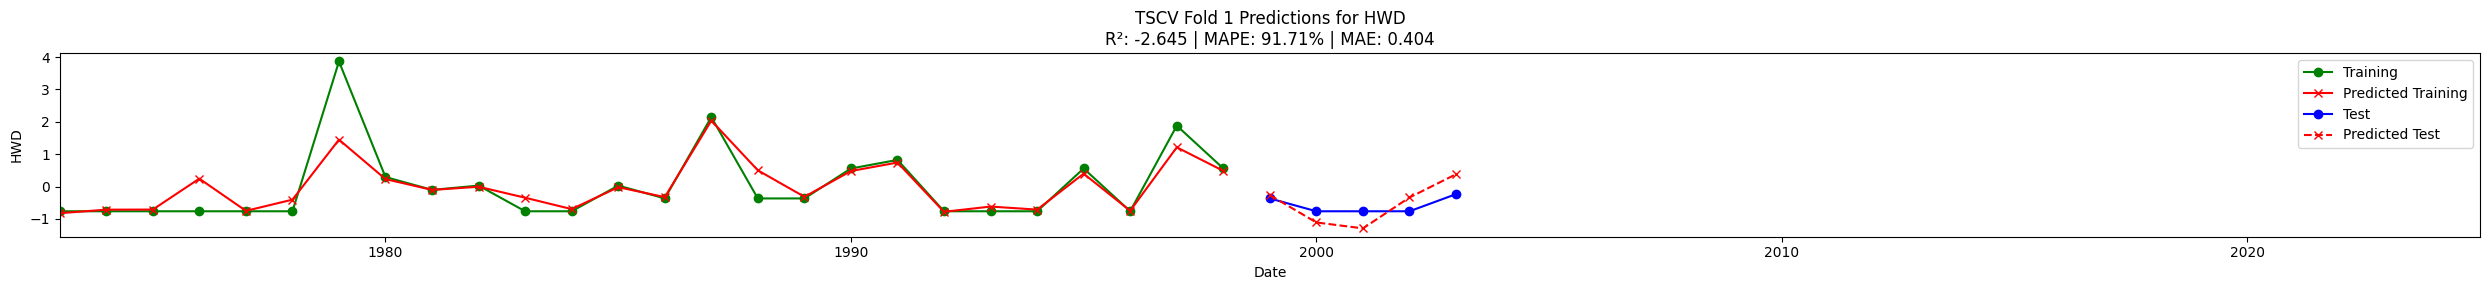

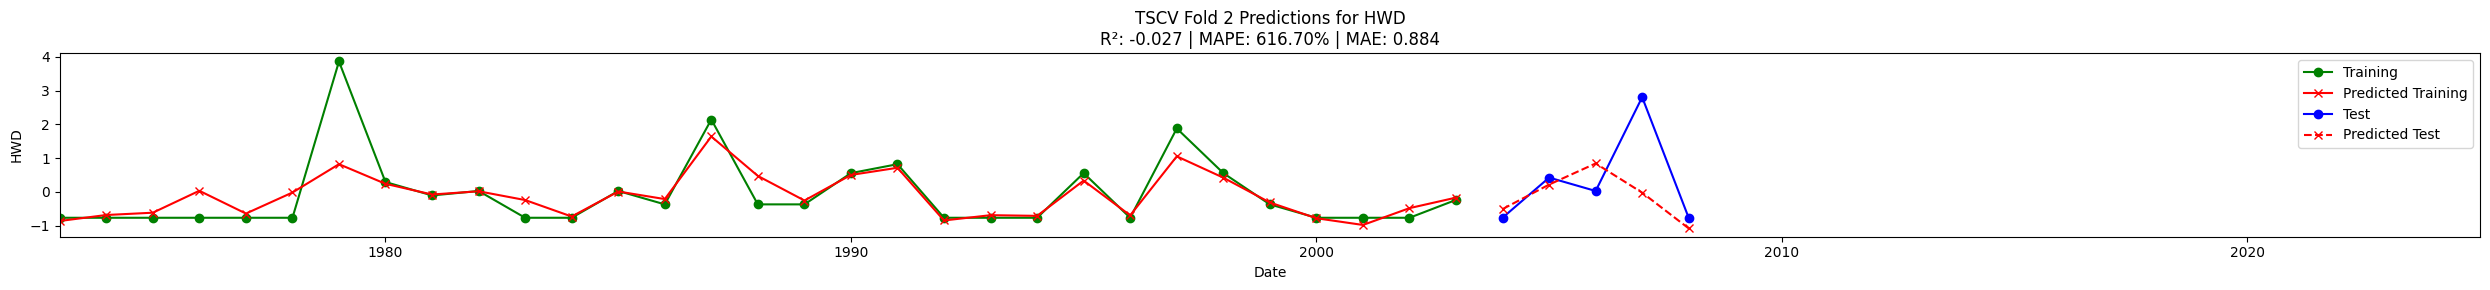

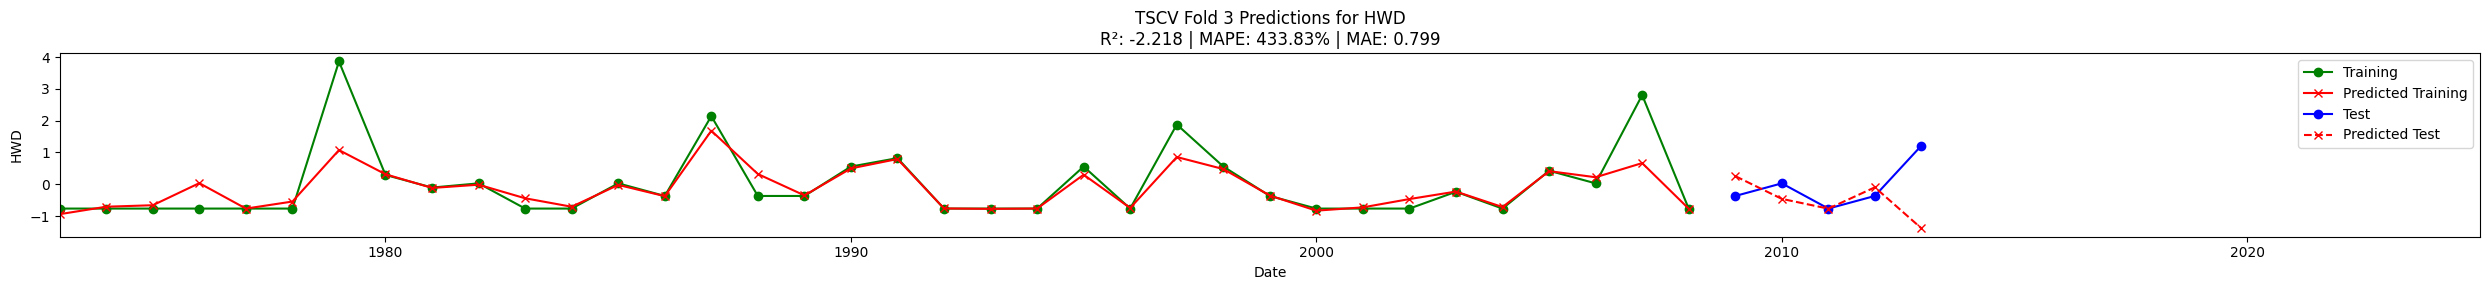

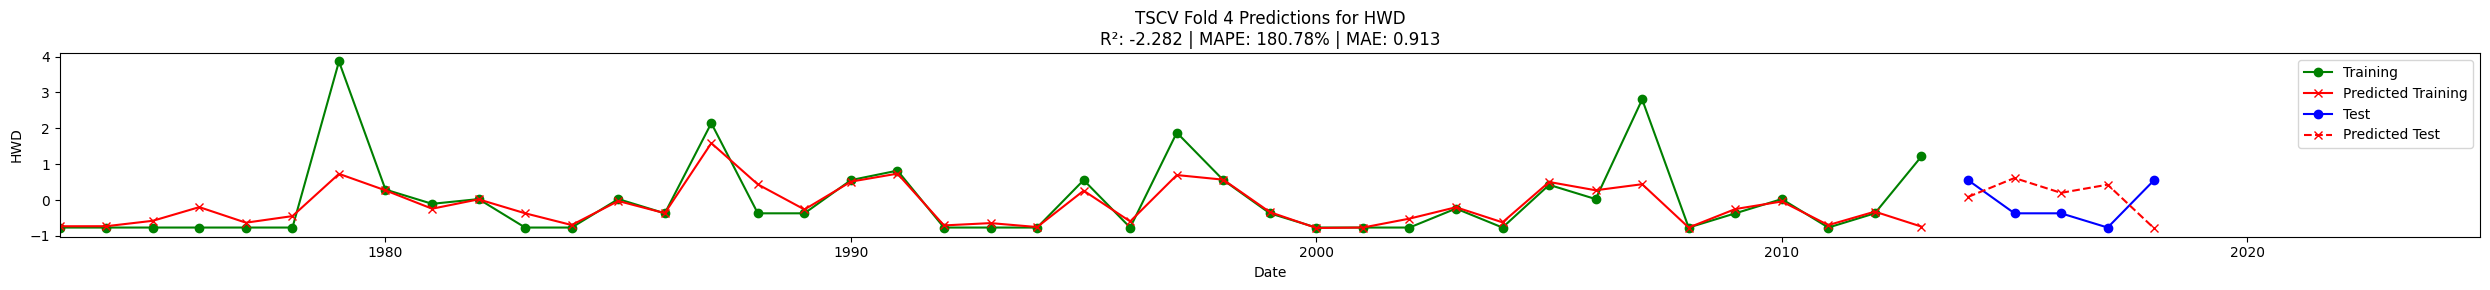

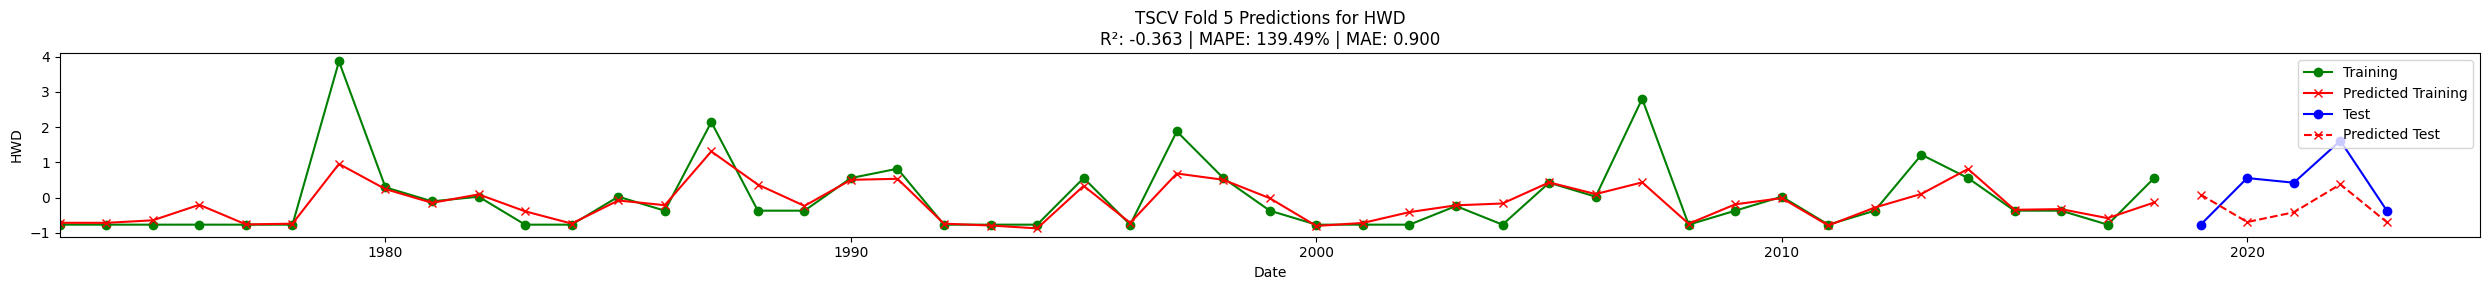

In [19]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["CNNRNN16"], 5, id)
    experiment_1.execute_experiment(label_plot=label)

### August

In [20]:
ids_to_execute = ["9bd58418"]
season = 8
label = "HWN"
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

filename   method rolling variables   
id                                                            
fde0e327  index_fde0e327.parquet     anom       1       SST  \
340e2882  index_340e2882.parquet     anom       1       SST   
b91ccd4e  index_b91ccd4e.parquet      max       1       MSL   
c6184040  index_c6184040.parquet     anom       1         U   
c1c59e4d  index_c1c59e4d.parquet     anom       1         U   
8c4a4c9c  index_8c4a4c9c.parquet     anom       1         U   
cb76aaa7  index_cb76aaa7.parquet     anom       1         U   
d416bd24  index_d416bd24.parquet     anom       1         U   
b259d0dd  index_b259d0dd.parquet     anom       1       MSL   
a15e4d0f  index_a15e4d0f.parquet     anom       1       MSL   
1223f1f4  index_1223f1f4.parquet     anom       1       MSL   
0d0d4c54  index_0d0d4c54.parquet     anom       1       MSL   
051cd6f3  index_051cd6f3.parquet      max       1       MSL   
422ed1de  index_422ed1de.parquet      max       1       MSL   
39b84026  index_39b84026.parquet      max       1       MSL   
PDO                      pdo.dat      EOF       1   SSTAnom   
ONI                      oni.txt     Anom       3       SST   
SAM                      sam.txt  DifAnom       1       SLP   
DMI                     dmi.data     Grad       1   SSTAnom   
ADV                            -     ADVU       1       U|T   

                              boxes reference_period target_period  
id                                                                  
fde0e327               190|240|-5|5        1980-2010     1972-2022  
340e2882              270|280|-10|0        1980-2010     1972-2022  
b91ccd4e            245|284|-45|-15            NoRef     1972-2022  
c6184040            282|289|-34|-30        1980-2010     1972-2022  
c1c59e4d          289|290.5|-34|-30        1980-2010     1972-2022  
8c4a4c9c            282|289|-38|-34        1980-2010     1972-2022  
cb76aaa7          282|288.5|-43|-38        1980-2010     1972-2022  
d416bd24          282|288.5|-53|-43        1980-2010     1972-2022  
b259d0dd          282|290.5|-34|-30        1980-2010     1972-2022  
a15e4d0f            282|289|-38|-34        1980-2010     1972-2022  
1223f1f4          282|288.5|-43|-38        1980-2010     1972-2022  
0d0d4c54          282|288.5|-53|-43        1980-2010     1972-2022  
051cd6f3            282|292|-34|-30            NoRef     1972-2022  
422ed1de            282|292|-38|-34            NoRef     1972-2022  
39b84026            282|292|-43|-38            NoRef     1972-2022  
PDO                   110|260|20|70          unknown     1972-2022  
ONI                    190|240|-5|5    30yearsliding     1972-2022  
SAM                     X|X|-65|-40        1981-2010     1972-2022  
DMI       50|70|-10|10;90|110|-10|0        1991-2020     1972-2022  
ADV                 282|288|-42|-26            NoRef     1972-2022

Executing 9bd58418 iter 1
2/2 [==============================] - 0s 3ms/step


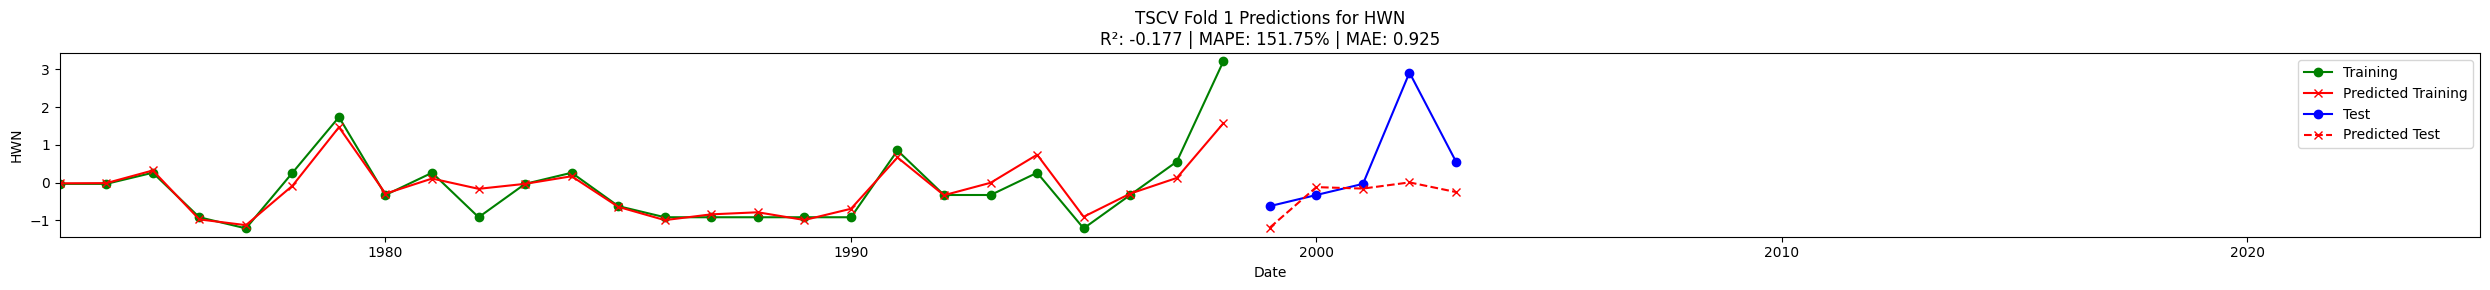

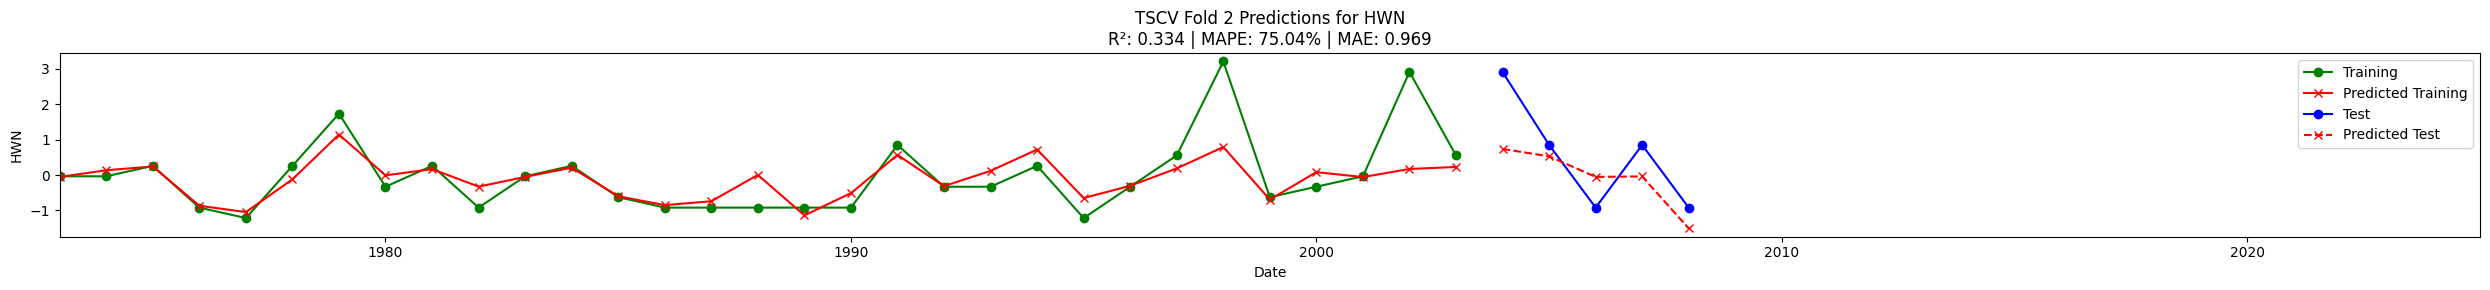

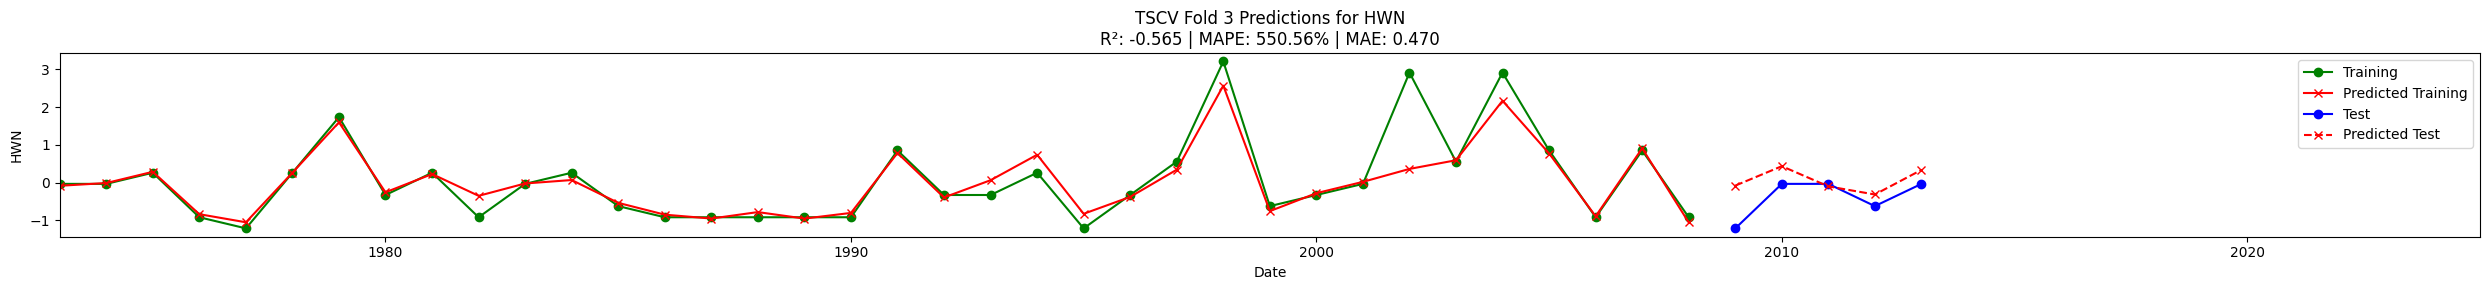

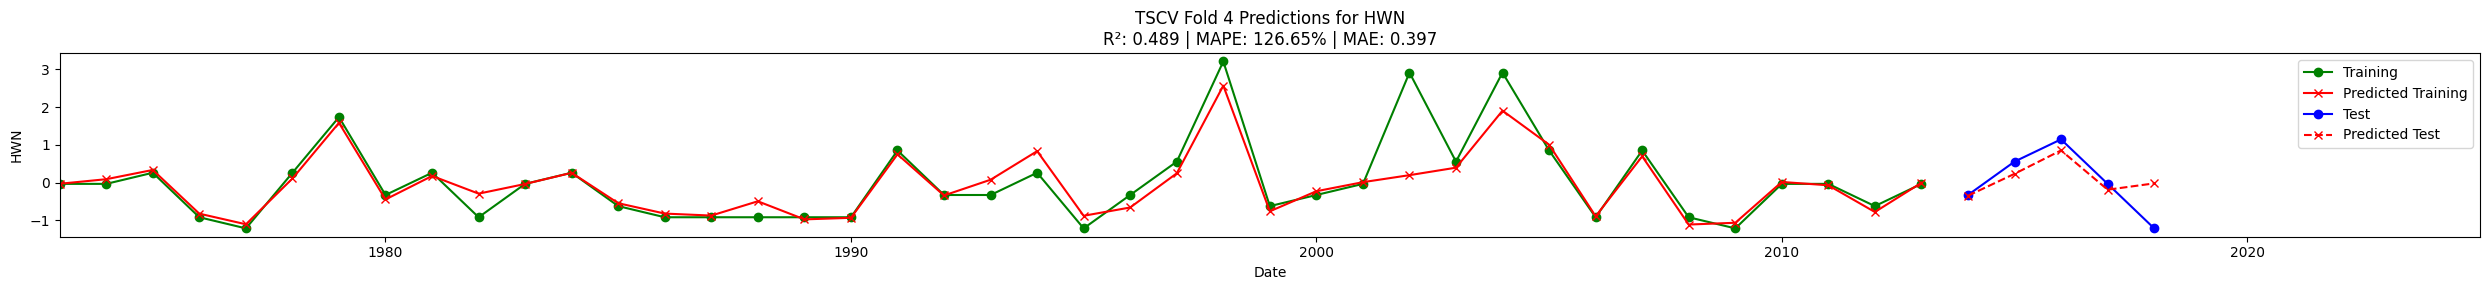

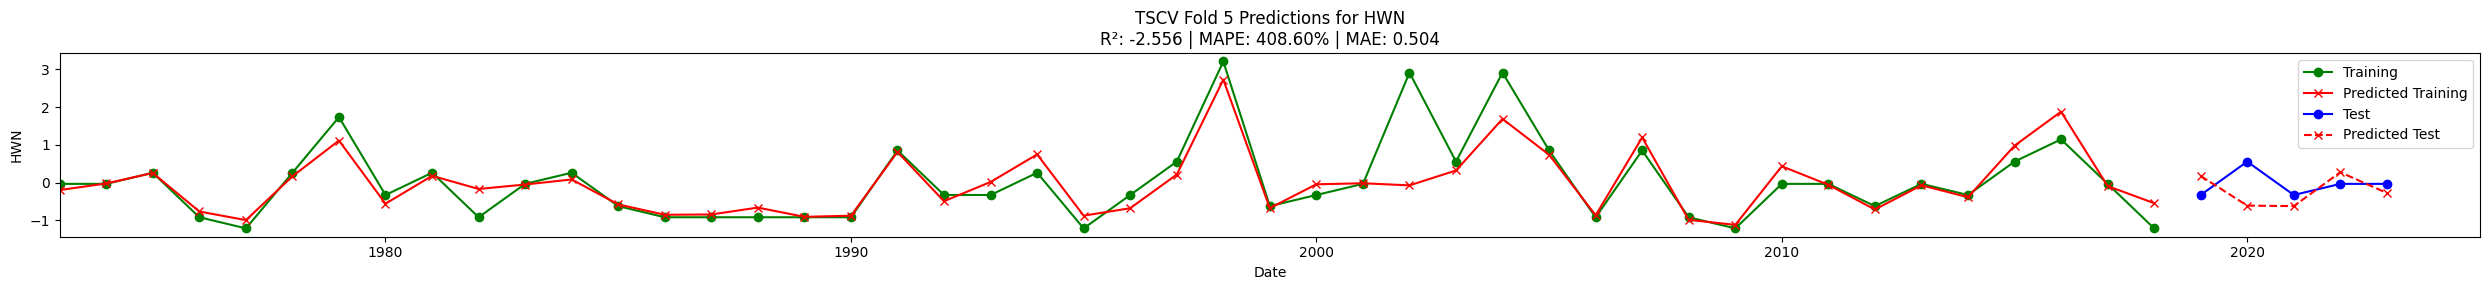

In [21]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        GRU(16, activation="tanh", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        Dropout(0.1),
        Dense(8, activation="relu"),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["GRU16"], 5, id)
    experiment_1.execute_experiment(label_plot=label)

### September

In [22]:
ids_to_execute = ["978f49d7"]
season = 9
label = "HWN"
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

filename   method rolling variables   
id                                                            
fde0e327  index_fde0e327.parquet     anom       1       SST  \
340e2882  index_340e2882.parquet     anom       1       SST   
43701738  index_43701738.parquet     anom       1        SP   
e306f58b  index_e306f58b.parquet     anom       1        SP   
e601b072  index_e601b072.parquet     anom       1        SP   
ecaf68aa  index_ecaf68aa.parquet     anom       1        SP   
711b08fc  index_711b08fc.parquet      max       1        SP   
89595d7b  index_89595d7b.parquet     anom       1       U10   
PDO                      pdo.dat      EOF       1   SSTAnom   
ONI                      oni.txt     Anom       3       SST   
SAM                      sam.txt  DifAnom       1       SLP   
DMI                     dmi.data     Grad       1   SSTAnom   

                              boxes reference_period target_period  
id                                                                  
fde0e327               190|240|-5|5        1980-2010     1972-2022  
340e2882              270|280|-10|0        1980-2010     1972-2022  
43701738            282|290|-34|-30        1980-2010     1972-2022  
e306f58b            282|290|-38|-34        1980-2010     1972-2022  
e601b072            282|290|-43|-38        1980-2010     1972-2022  
ecaf68aa            282|290|-56|-43        1980-2010     1972-2022  
711b08fc            220|280|-35|-10            NoRef     1972-2022  
89595d7b            282|290|-37|-30        1980-2010     1972-2022  
PDO                   110|260|20|70          unknown     1972-2022  
ONI                    190|240|-5|5    30yearsliding     1972-2022  
SAM                     X|X|-65|-40        1981-2010     1972-2022  
DMI       50|70|-10|10;90|110|-10|0        1991-2020     1972-2022

Executing 978f49d7 iter 1
2/2 [==============================] - 0s 2ms/step


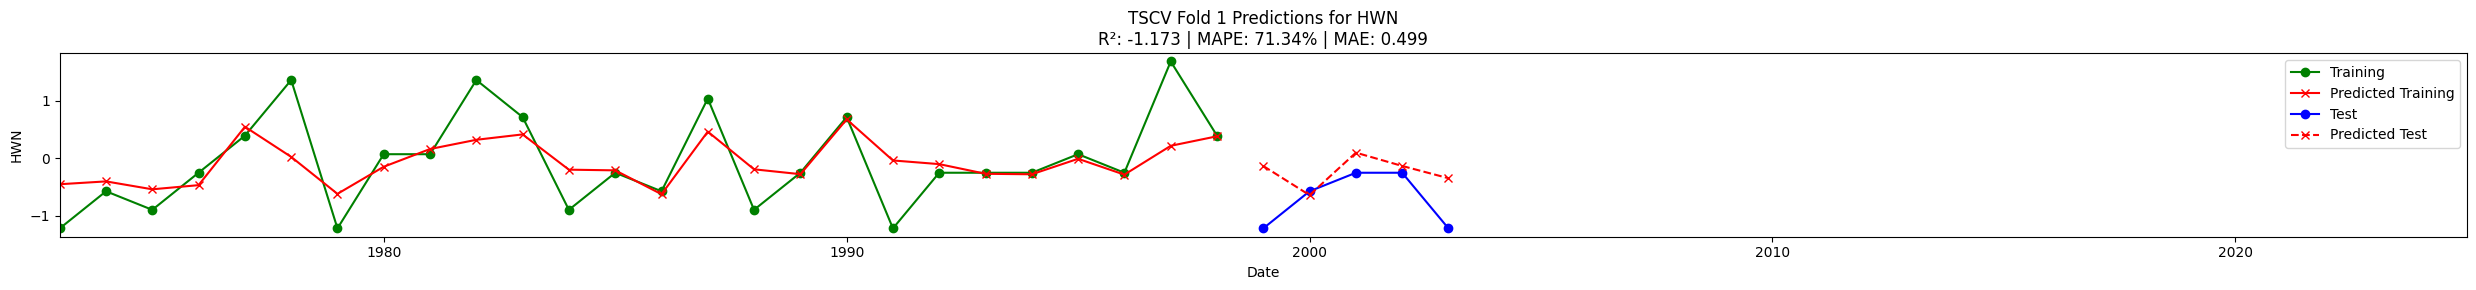

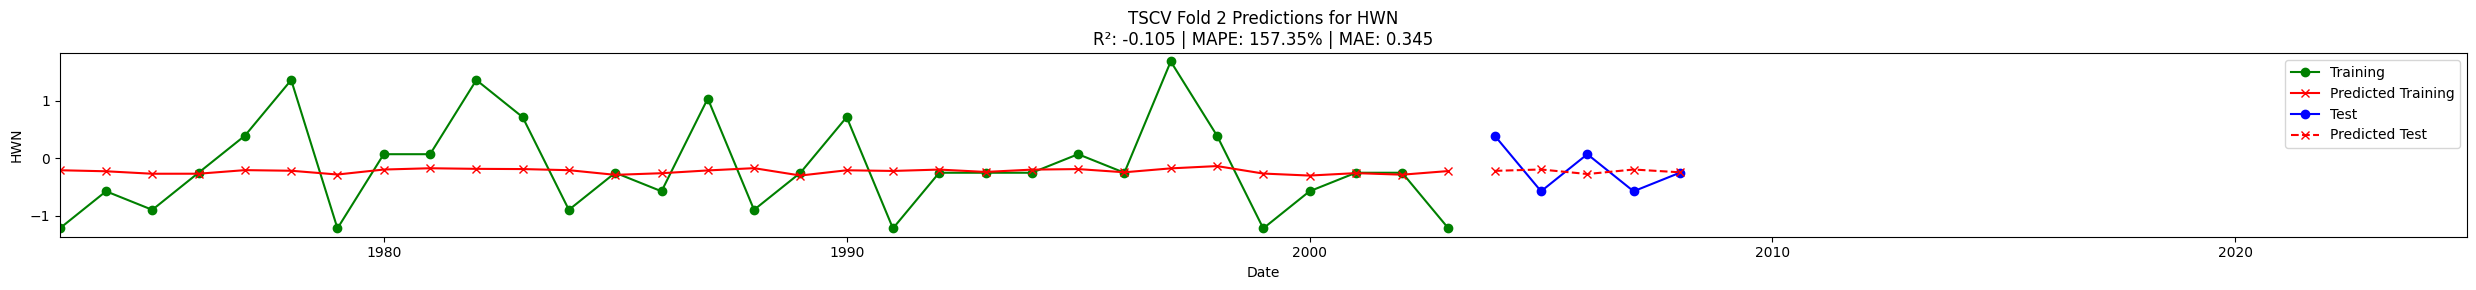

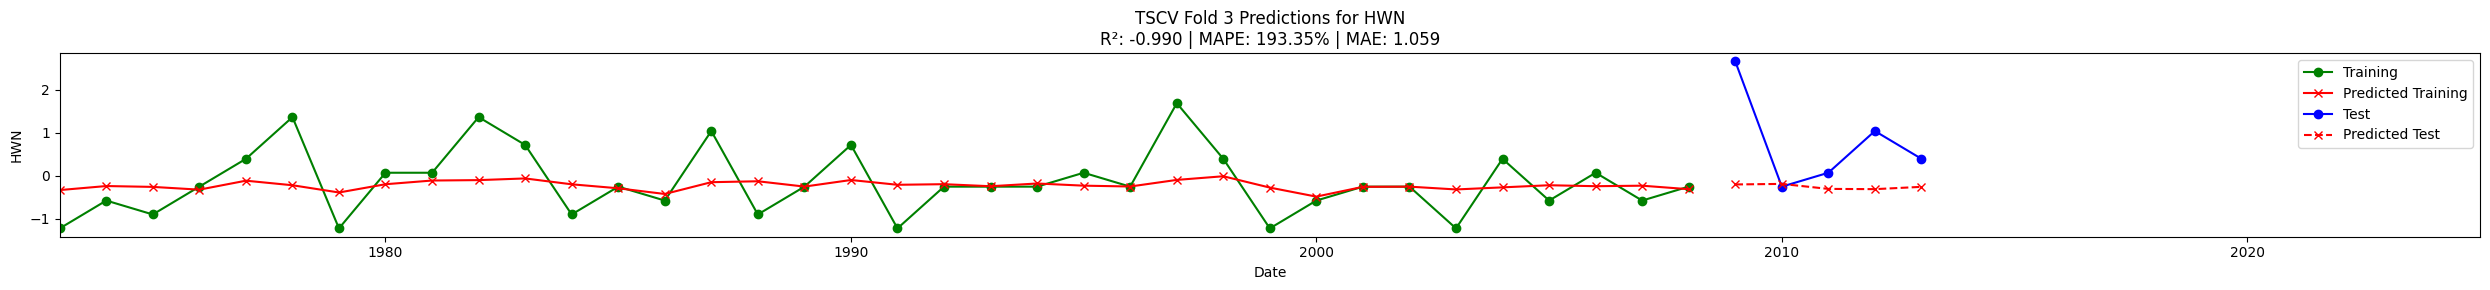

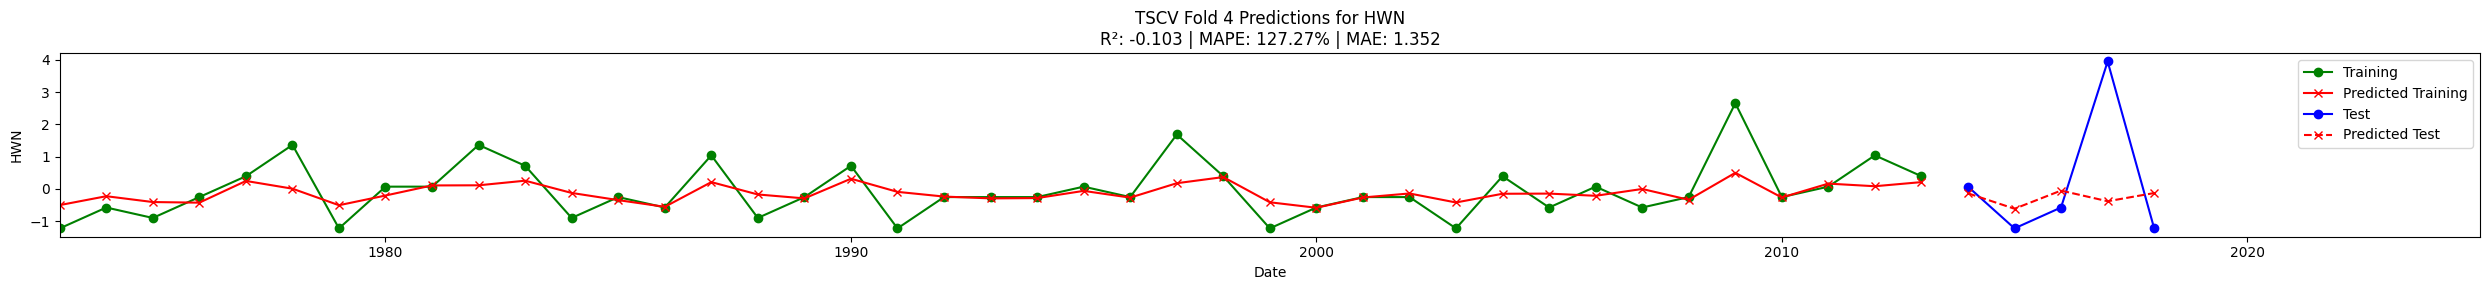

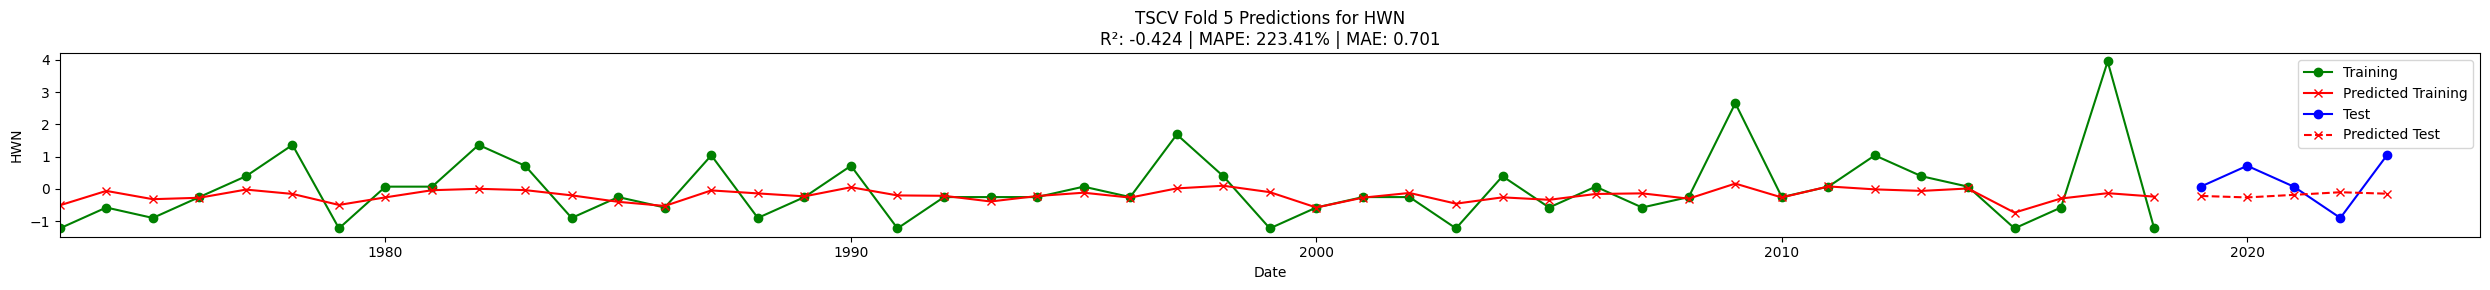

In [23]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        LSTM(16, activation="tanh", return_sequences=True, input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        LSTM(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["SLSTM16"], 5, id)
    experiment_1.execute_experiment(label_plot=label)

### October

In [24]:
ids_to_execute = ["9f8163e4"]
season = 10
label = "HWN"
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

filename   method rolling variables   
id                                                            
fde0e327  index_fde0e327.parquet     anom       1       SST  \
340e2882  index_340e2882.parquet     anom       1       SST   
8c5bce37  index_8c5bce37.parquet     anom       1         T   
880b8b63  index_880b8b63.parquet      max       1       MSL   
c6b80290  index_c6b80290.parquet     anom       1         U   
3111321a  index_3111321a.parquet     anom       1         U   
88249a81  index_88249a81.parquet     anom       1       MSL   
f6e4a28a  index_f6e4a28a.parquet     anom       1       MSL   
7728bf70  index_7728bf70.parquet     anom       1       MSL   
a66b8219  index_a66b8219.parquet     anom       1       MSL   
285aed8e  index_285aed8e.parquet     anom       1       ADV   
59f835e4  index_59f835e4.parquet     anom       1       ADV   
PDO                      pdo.dat      EOF       1   SSTAnom   
ONI                      oni.txt     Anom       3       SST   
SAM                      sam.txt  DifAnom       1       SLP   
DMI                     dmi.data     Grad       1   SSTAnom   

                              boxes reference_period target_period  
id                                                                  
fde0e327               190|240|-5|5        1980-2010     1972-2022  
340e2882              270|280|-10|0        1980-2010     1972-2022  
8c5bce37            286|288|-42|-33        1980-2010     1972-2022  
880b8b63            260|284|-44|-17            NoRef     1972-2022  
c6b80290        287.5|289.5|-37|-33        1980-2010     1972-2022  
3111321a        286.5|288.5|-42|-37        1980-2010     1972-2022  
88249a81            286|292|-52|-40        1980-2010     1972-2022  
f6e4a28a          286|288.5|-33|-28        1980-2010     1972-2022  
7728bf70            280|286|-38|-30        1980-2010     1972-2022  
a66b8219            291|295|-38|-30        1980-2010     1972-2022  
285aed8e            282|286|-42|-33        1980-2010     1972-2022  
59f835e4            268|283|-32|-20        1980-2010     1972-2022  
PDO                   110|260|20|70          unknown     1972-2022  
ONI                    190|240|-5|5    30yearsliding     1972-2022  
SAM                     X|X|-65|-40        1981-2010     1972-2022  
DMI       50|70|-10|10;90|110|-10|0        1991-2020     1972-2022

Executing 9f8163e4 iter 1
2/2 [==============================] - 0s 997us/step


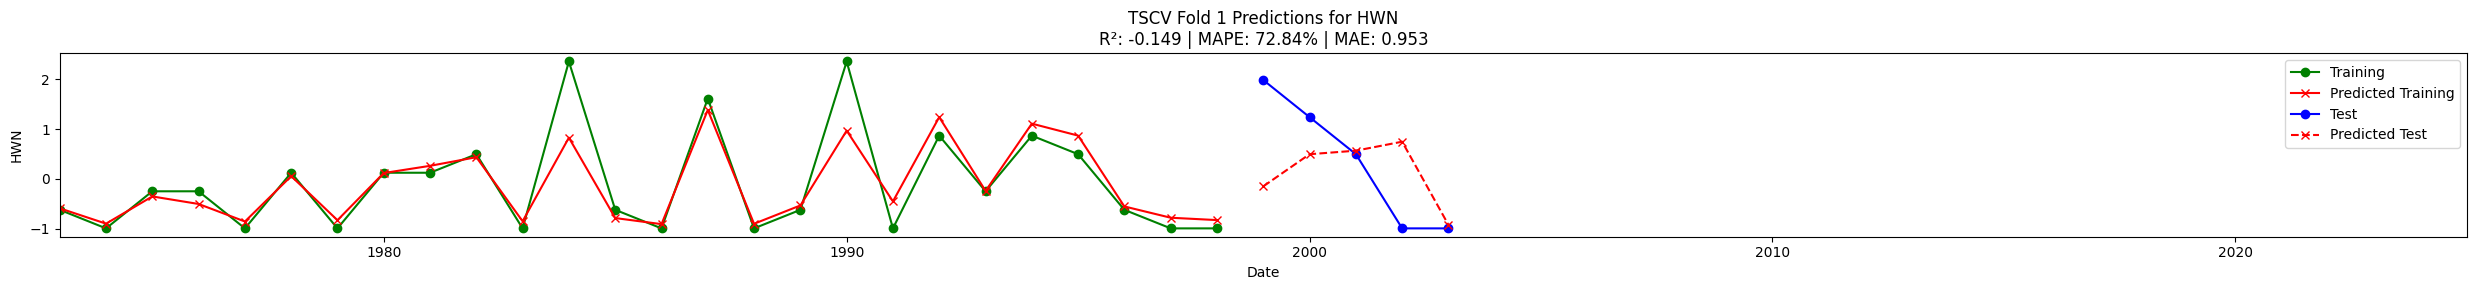

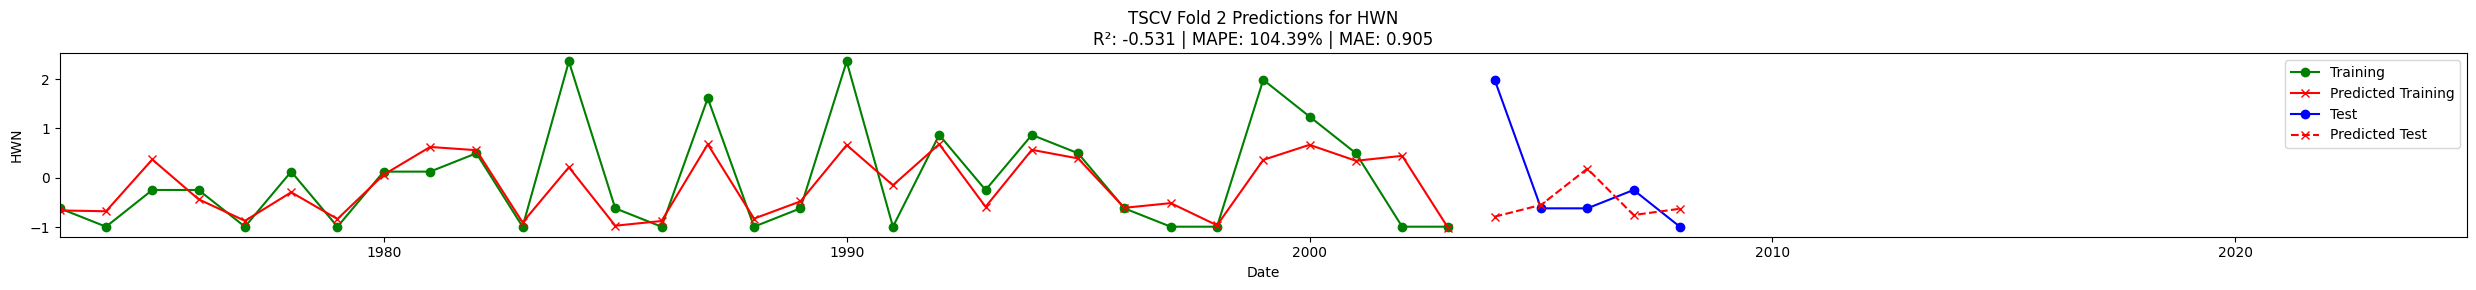

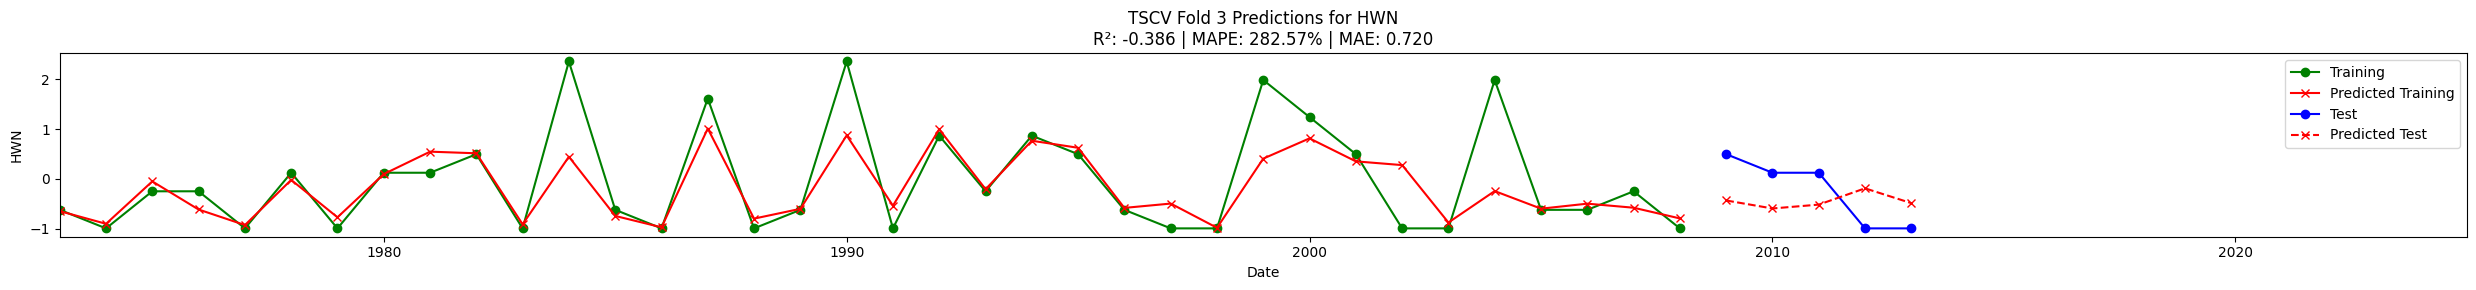

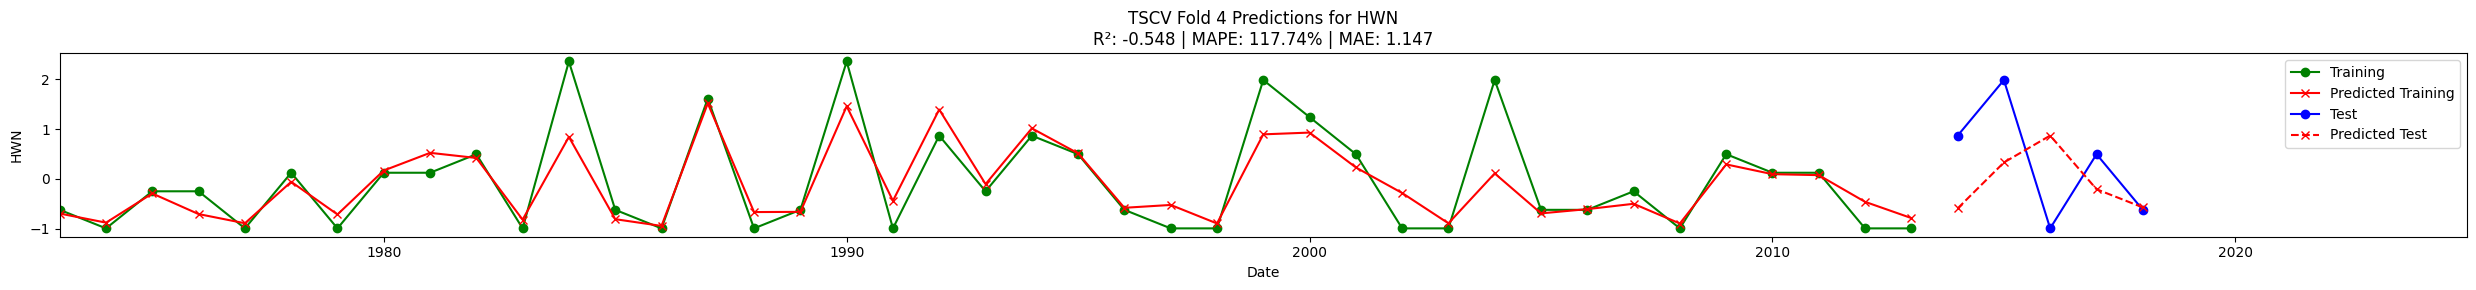

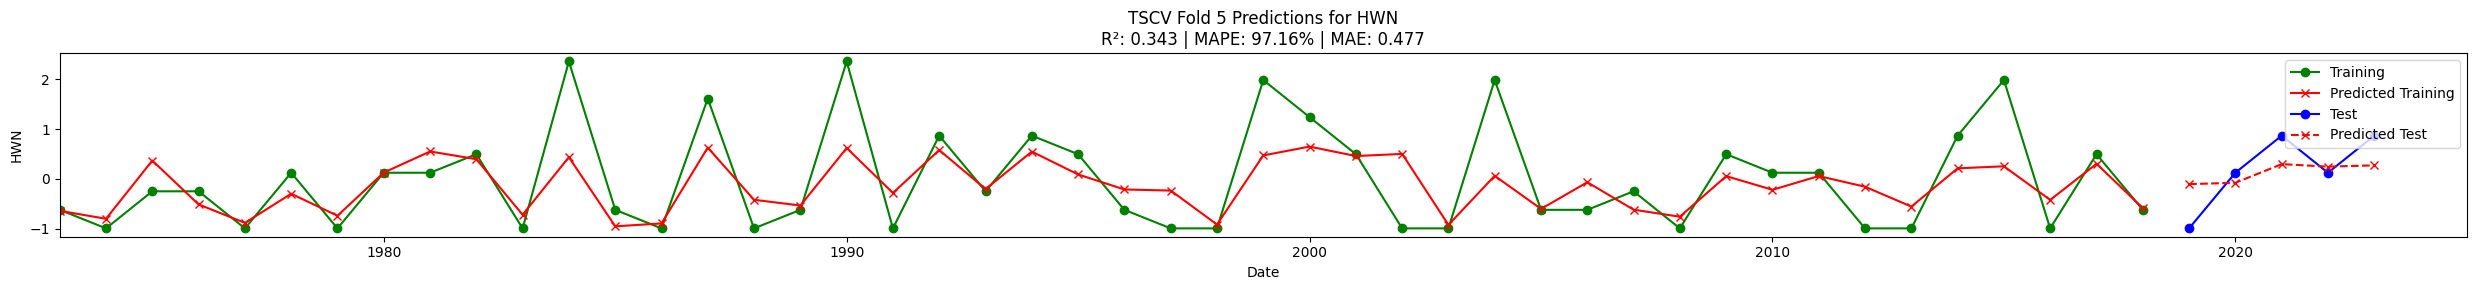

In [25]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        LSTM(16, activation="tanh", return_sequences=True, input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        LSTM(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["SLSTM16"], 5, id)
    experiment_1.execute_experiment(label_plot=label)

### November

In [26]:
ids_to_execute = ["458d357c"]
season = 11
label = "HWM"
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

filename   method rolling variables   
id                                                            
32f131d2  index_32f131d2.parquet     anom       1       SST  \
69ffcfa8  index_69ffcfa8.parquet     anom       1       SST   
4af95abb  index_4af95abb.parquet     anom       1         T   
4a86cb22  index_4a86cb22.parquet      max       1       MSL   
52eda853  index_52eda853.parquet     anom       1         U   
3bcb0703  index_3bcb0703.parquet     anom       1         U   
1c12658a  index_1c12658a.parquet     anom       1       MSL   
3c2a06b5  index_3c2a06b5.parquet     anom       1       MSL   
c7744922  index_c7744922.parquet     anom       1       MSL   
3e97f7f5  index_3e97f7f5.parquet     anom       1       MSL   
57c4c65d  index_57c4c65d.parquet     anom       1       ADV   
8f223d89  index_8f223d89.parquet     anom       1       ADV   
PDO                      pdo.dat      EOF       1   SSTAnom   
ONI                      oni.txt     Anom       3       SST   
SAM                      sam.txt  DifAnom       1       SLP   
DMI                     dmi.data     Grad       1   SSTAnom   

                              boxes reference_period target_period  
id                                                                  
32f131d2               190|240|-5|5        1980-2010     1972-2022  
69ffcfa8              270|280|-10|0        1980-2010     1972-2022  
4af95abb            286|288|-42|-33        1980-2010     1972-2022  
4a86cb22            260|284|-44|-17        1980-2010     1972-2022  
52eda853        287.5|289.5|-37|-33        1980-2010     1972-2022  
3bcb0703        286.5|288.5|-42|-37        1980-2010     1972-2022  
1c12658a            286|292|-52|-40        1980-2010     1972-2022  
3c2a06b5          286|288.5|-33|-28        1980-2010     1972-2022  
c7744922            280|286|-38|-30        1980-2010     1972-2022  
3e97f7f5            291|295|-38|-30        1980-2010     1972-2022  
57c4c65d            282|286|-42|-33        1980-2010     1972-2022  
8f223d89            268|283|-32|-20        1980-2010     1972-2022  
PDO                   110|260|20|70          unknown     1972-2022  
ONI                    190|240|-5|5    30yearsliding     1972-2022  
SAM                     X|X|-65|-40        1981-2010     1972-2022  
DMI       50|70|-10|10;90|110|-10|0        1991-2020     1972-2022

Executing 458d357c iter 1
2/2 [==============================] - 0s 2ms/step


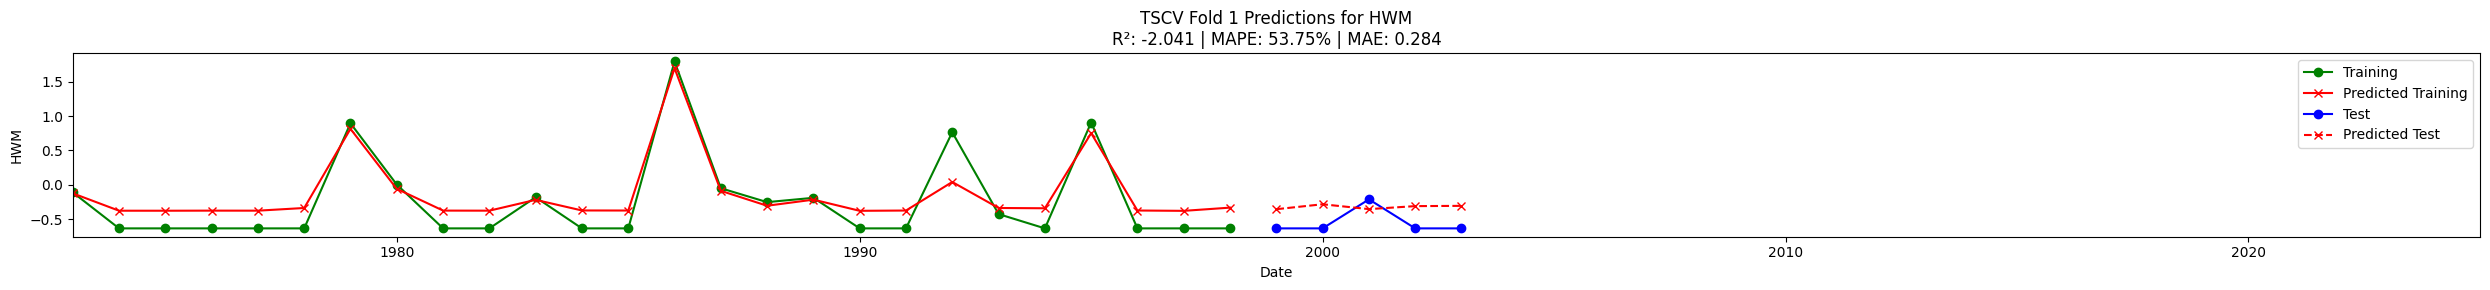

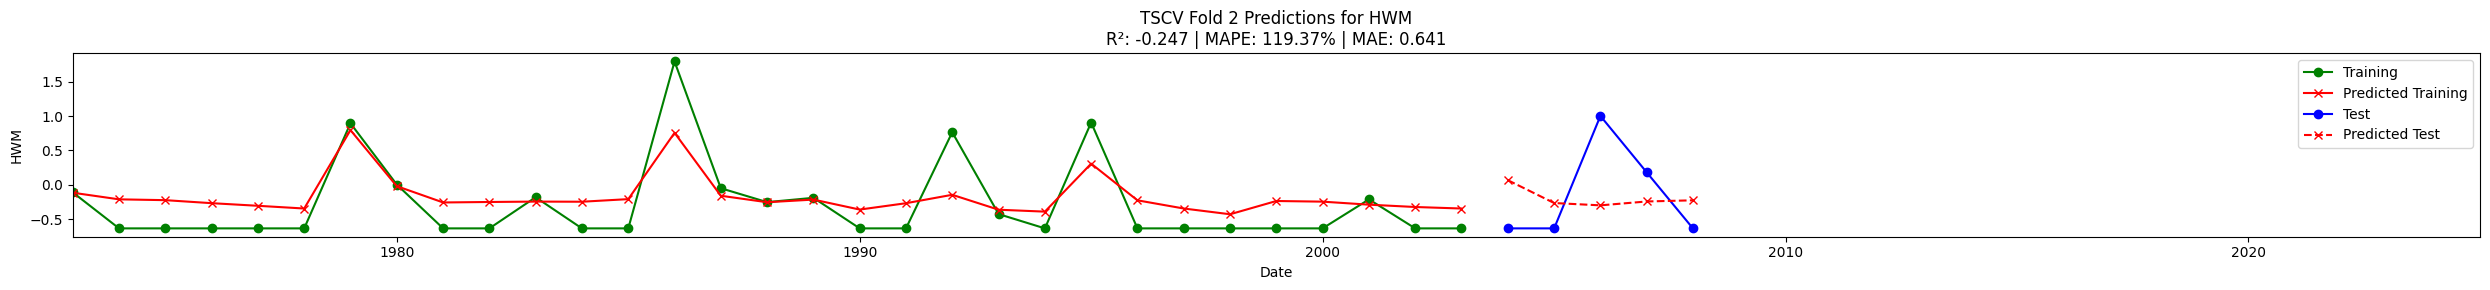

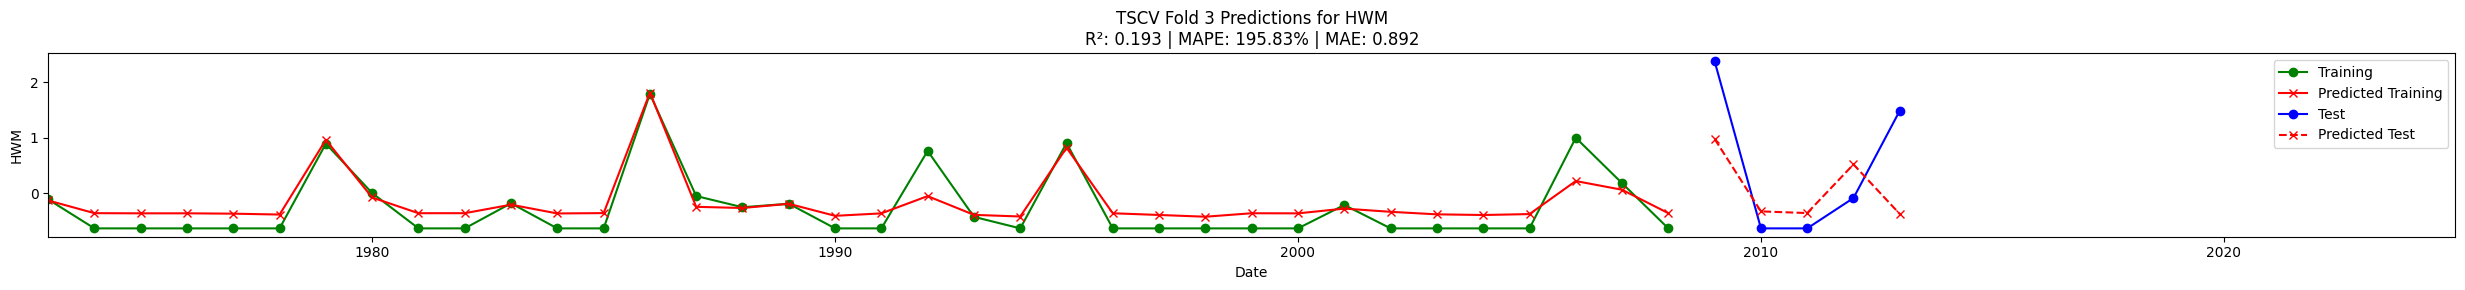

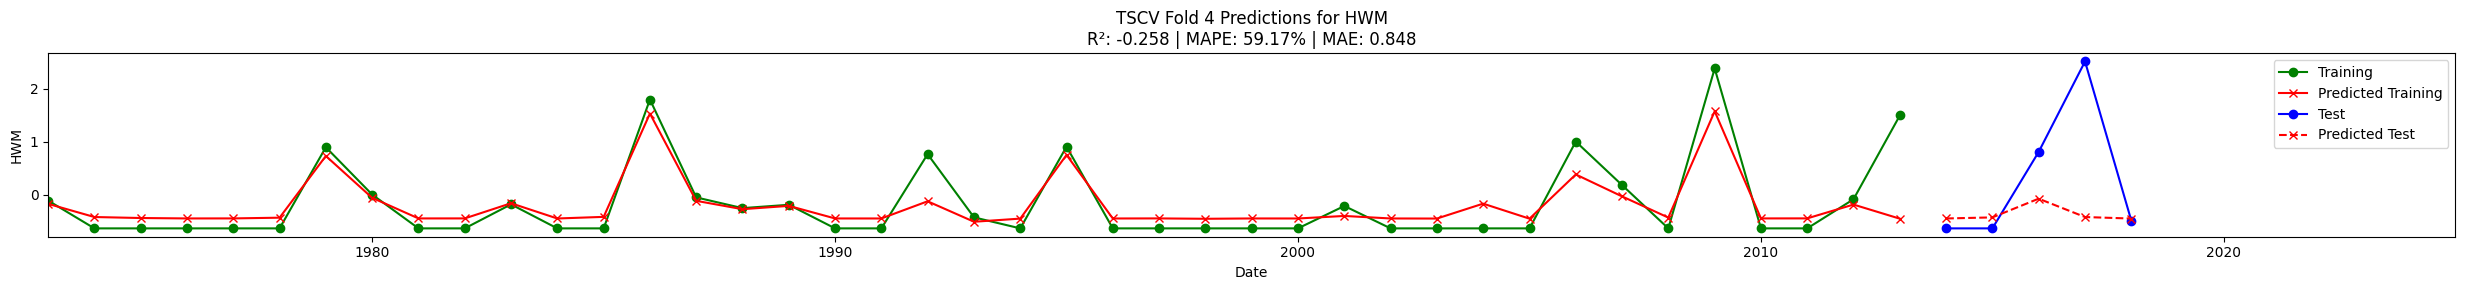

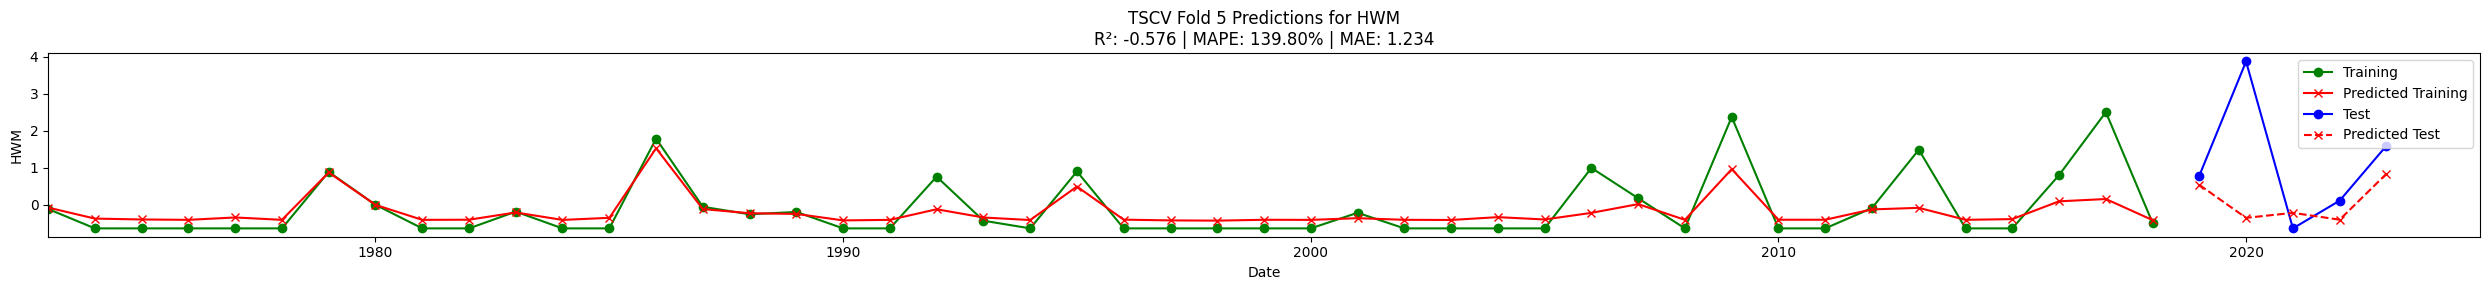

In [27]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
    LSTM(16, activation="tanh", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
    Dropout(0.1),  # Regularization
    Dense(8, activation="relu"),
    Dense(len(indices_of_interest))  # Predict 5 indices
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["LSTM16"], 5, id)
    experiment_1.execute_experiment(label_plot=label)

### December

In [28]:
ids_to_execute = ["ecf2577f"]
season = 12
label = "HWF"
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

filename      method rolling            variables   
id                                                                          
1f3bbd82  index_1f3bbd82.parquet    normdiff     MSL       vaguada|config  \
aac61eb2  index_aac61eb2.parquet  normalized     ADV      268|283|-32|-20   
bf935817  index_bf935817.parquet  normalized     ADV      282|286|-42|-33   
80ce3764  index_80ce3764.parquet     bloqueo   U|MSL  bloqueo|norte|boxes   
d6188e35  index_d6188e35.parquet     bloqueo   U|MSL    bloqueo|sur|boxes   
74b64e71  index_74b64e71.parquet        anom       1                  SST   
e08793a9  index_e08793a9.parquet        anom       1                  SST   
15f248b7  index_15f248b7.parquet        anom       1                    T   
f00694af  index_f00694af.parquet         max       1                  MSL   
PDO                      pdo.dat         EOF       1              SSTAnom   
ONI                      oni.txt        Anom       3                  SST   
SAM                      sam.txt     DifAnom       1                  SLP   
DMI                     dmi.data        Grad       1              SSTAnom   

                              boxes reference_period target_period  
id                                                                  
1f3bbd82                      NoRef        1972-2022           NaN  
aac61eb2                  1972-2024        1972-2022           NaN  
bf935817                  1972-2024        1972-2022           NaN  
80ce3764                  1980-2010        1972-2022           NaN  
d6188e35                  1980-2010        1972-2022           NaN  
74b64e71              270|280|-10|0        1980-2010     1972-2022  
e08793a9               190|240|-5|5        1980-2010     1972-2022  
15f248b7            286|288|-42|-33        1980-2010     1972-2022  
f00694af            260|284|-44|-17        1980-2010     1972-2022  
PDO                   110|260|20|70          unknown     1972-2022  
ONI                    190|240|-5|5    30yearsliding     1972-2022  
SAM                     X|X|-65|-40        1981-2010     1972-2022  
DMI       50|70|-10|10;90|110|-10|0        1991-2020     1972-2022

Executing ecf2577f iter 1
2/2 [==============================] - 0s 2ms/step


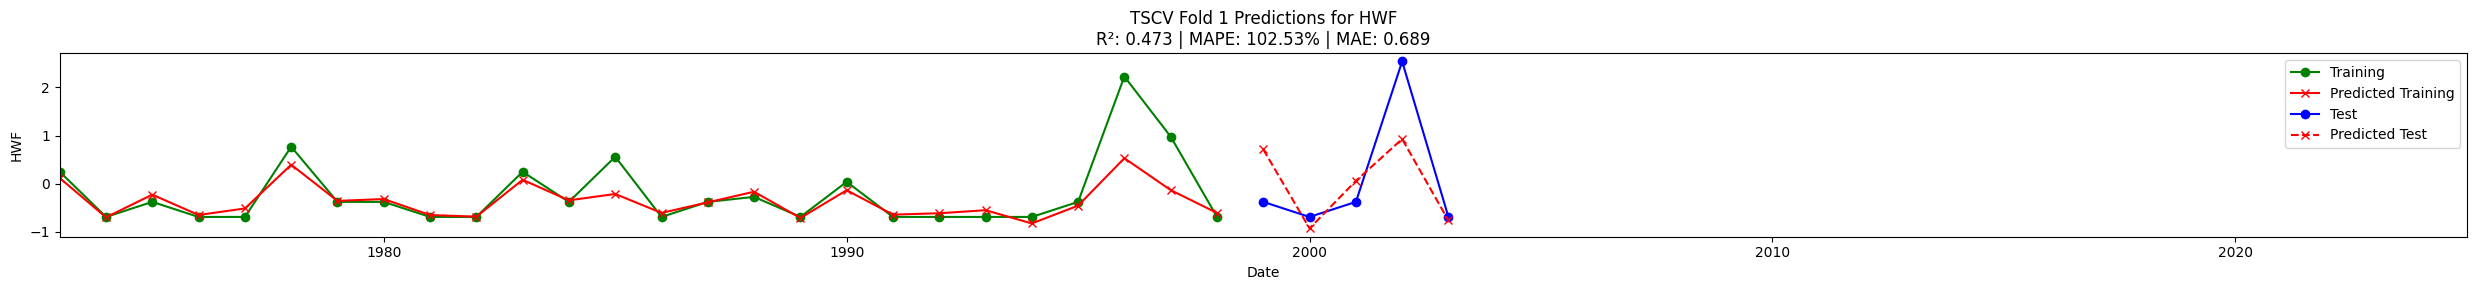

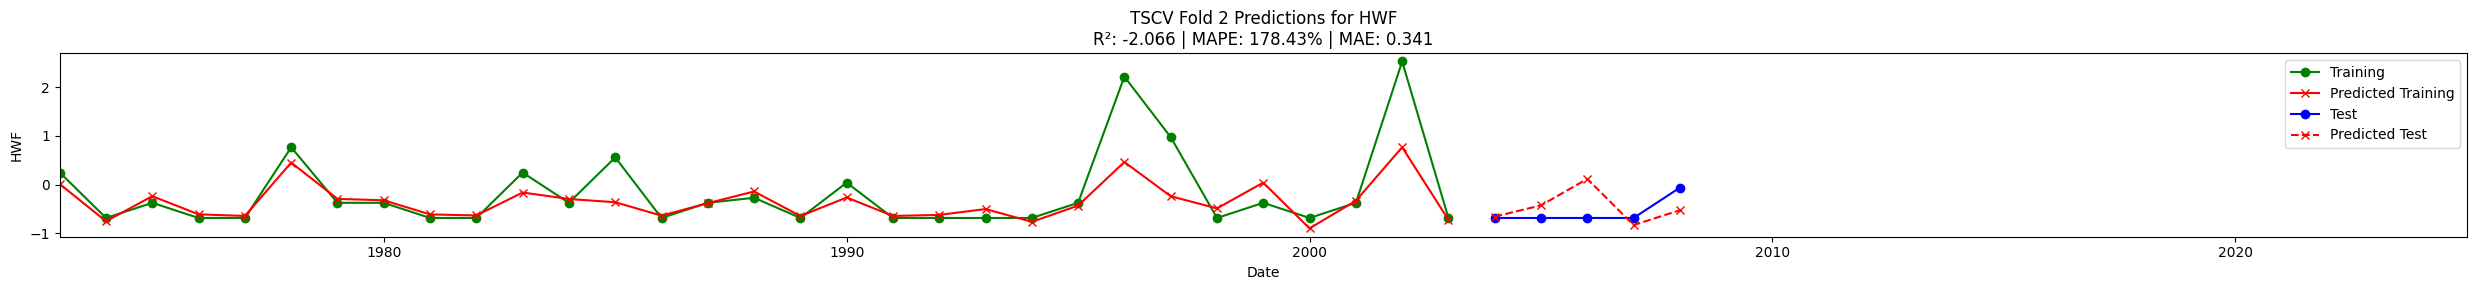

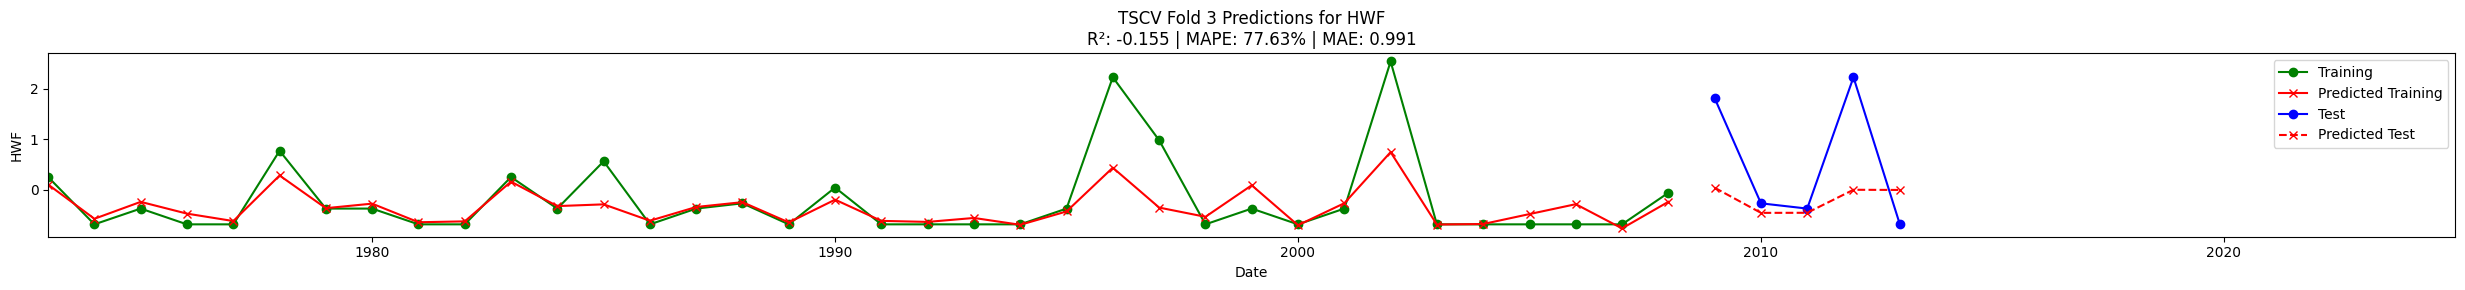

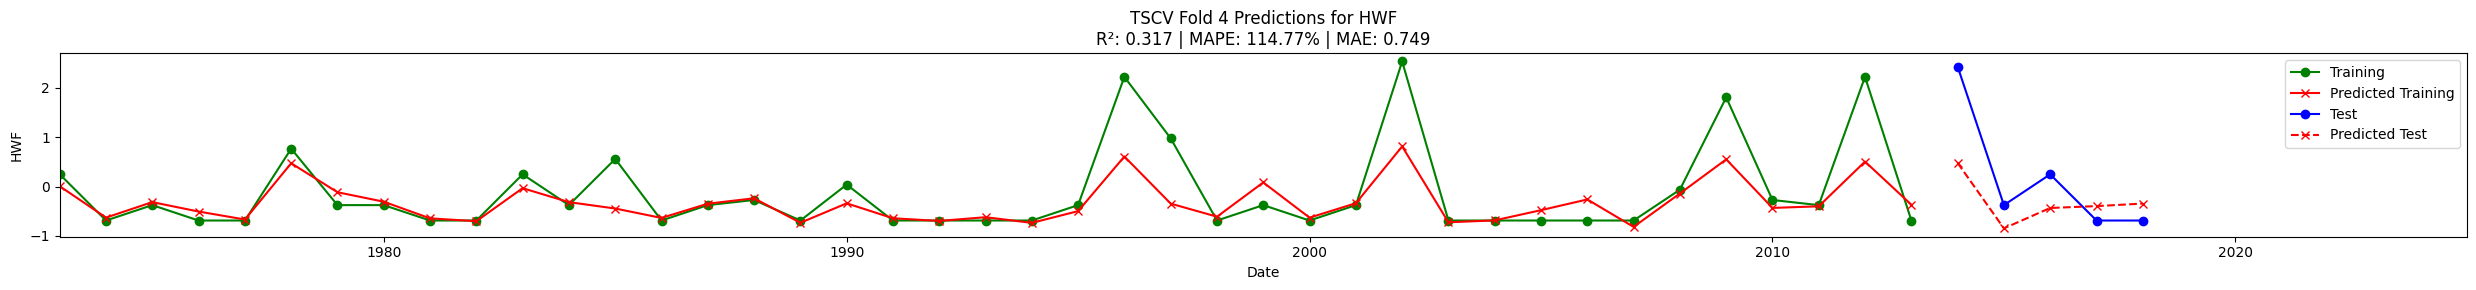

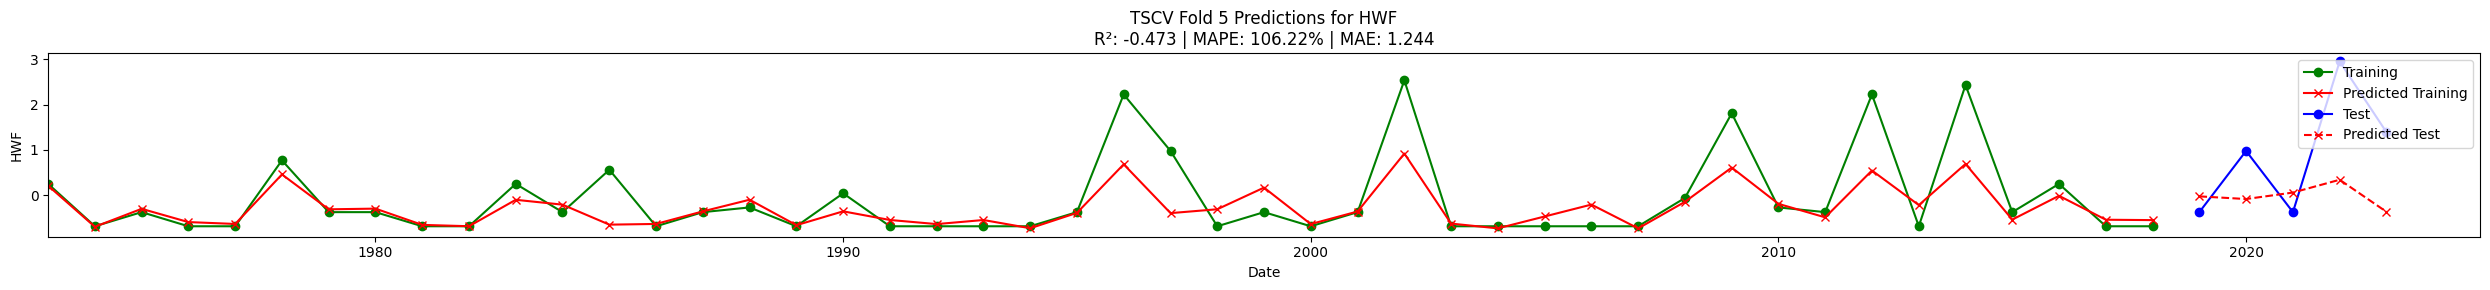

In [29]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["CNNRNN16"], 5, id)
    experiment_1.execute_experiment(label_plot=label)

1/1 [==============================] - 0s 20ms/step


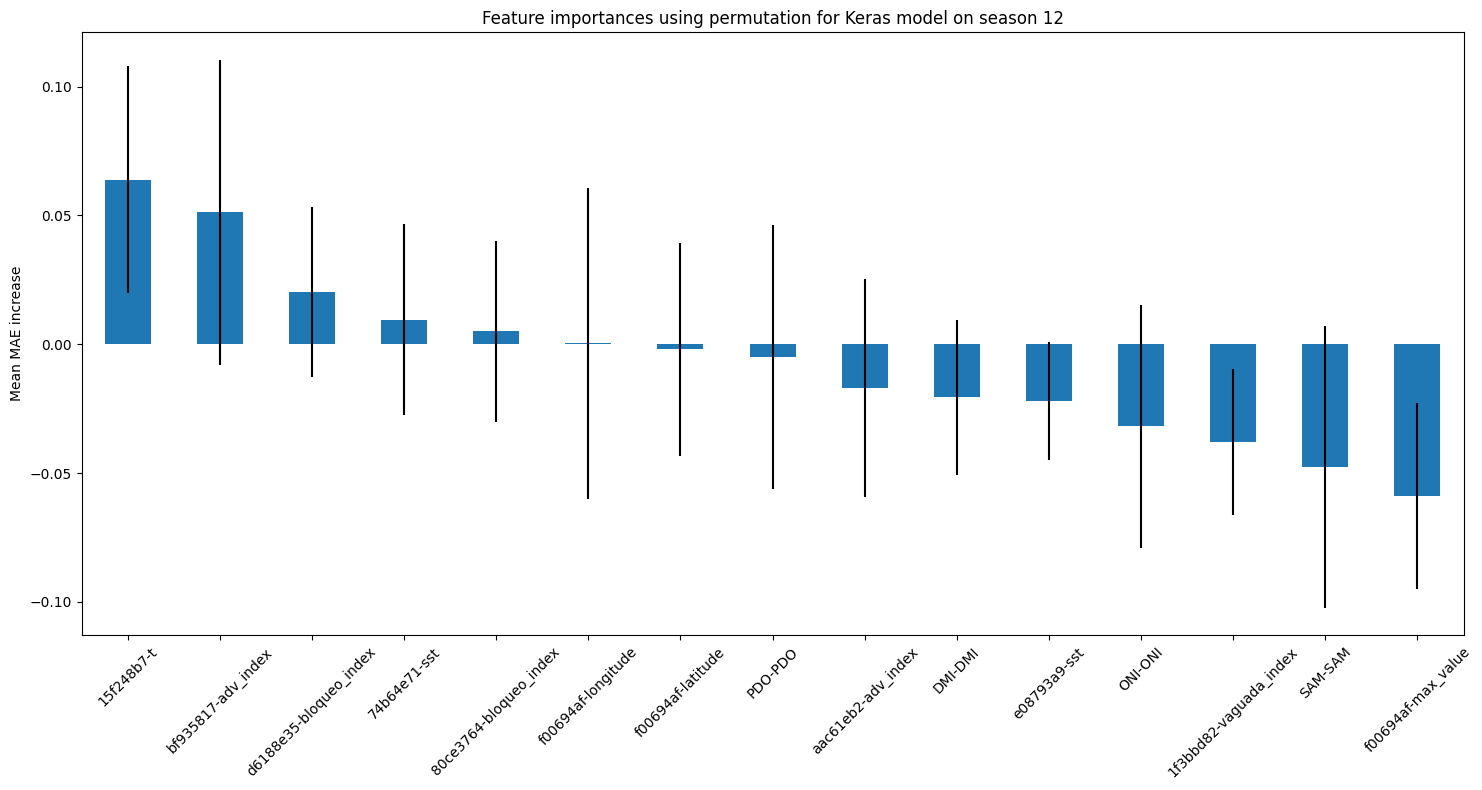

In [30]:
experiment_1.get_feature_importance(season, "CNNRNN16", method="nn")